<a href="https://colab.research.google.com/github/Victor-alik/reportes_cs/blob/main/dash_boardrep_cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dash

In [ ]:
pip install dash-bootstrap-components

In [ ]:
pip install selenium

In [ ]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dash import Dash, html, dcc, callback, Output, Input, dash_table, ctx
from dash.dash_table import DataTable, FormatTemplate
import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objs import Legend
import base64
import dash_bootstrap_components as dbc
from selenium import webdriver

In [ ]:
#leemos la base de datos
df=pd.read_excel('ComiteReporte9.xlsx')
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,h,m,Total H/M,monto,com_uni,id_com_sics,id_proy_sics,apoyo_x_com,fech_cap_sics,fech_act
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,0,1,1,13500,SI,926534,1409037,1,2023-05-27,2023-05-27
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,0,1,1,13500,SI,926535,1409038,1,2023-05-27,2023-05-27
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,1,0,1,13500,SI,926537,1409039,1,2023-05-27,2023-11-27
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,1,0,1,13500,SI,926539,1409040,1,2023-05-27,2023-05-27
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,0,1,1,13500,SI,926540,1409041,1,2023-05-27,2023-05-27


In [ ]:
#Leemos la base de datos de los PETCS
df_petc=pd.read_excel('ComiteReporte9.xlsx', sheet_name='petc')
df_petc.head()

,est,act,resp,fech_ini,fech_fin,fech_real,col_sema
0,JALISCO,Capturar en el SICS el programa estatal de tra...,Instancia ejecutora,2023-01-01,2023-12-31,2023-06-26,0
1,JALISCO,Capturar en el SICS la distribucipon de los ma...,Instancia normativa,2023-01-01,2023-12-31,NaT,0
2,JALISCO,Capturar en el SICS la distribución de los mat...,Instancia ejecutora,2023-01-01,2023-12-31,NaT,0
3,JALISCO,"Registrar la información de las obras, apoyos ...",Instancia ejecutora,2023-01-01,2023-12-31,2023-06-28,0
4,JALISCO,Capturar en el SICS los Comités de Contraloria...,Instancia normativa,2023-01-01,2023-12-31,2023-06-28,0


In [ ]:
#Observamos las columnas del df generado
df.columns

Index(['ef_fisc', 'prog_fed', 'tip_ejec', 'nom_ejesc', 'est', 'mun', 'loc',
       'proyecto', 'cve_est', 'est.1', 'cve_mun', 'mun.1', 'cve_loc', 'loc.1',
       'fech_rec_asig', 'nom', 'cve_reg', 'fech_cons', 'h', 'm', 'Total H/M',
       'monto', 'com_uni', 'id_com_sics', 'id_proy_sics', 'apoyo_x_com',
       'fech_cap_sics', 'fech_act'],
      dtype='object')

In [ ]:
df.describe()

,ef_fisc,cve_est,cve_mun,cve_loc,h,m,Total H/M,monto,id_com_sics,id_proy_sics,apoyo_x_com
count,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02,1.720000e+02,172.0
mean,2023.0,19.139535,46.331395,120.593023,0.383721,0.627907,1.011628,12636.627907,9.993200e+05,1.502886e+06,1.0
std,0.0,7.573674,52.870033,321.126212,0.487711,0.508329,0.107517,3312.689800,4.137838e+04,4.769144e+04,0.0
min,2023.0,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,9.265340e+05,1.409037e+06,1.0
25%,2023.0,14.000000,9.000000,1.000000,0.000000,0.000000,1.000000,13500.000000,9.752108e+05,1.473541e+06,1.0
50%,2023.0,21.000000,22.000000,1.000000,0.000000,1.000000,1.000000,13500.000000,1.024486e+06,1.533033e+06,1.0
75%,2023.0,25.000000,70.000000,45.000000,1.000000,1.000000,1.000000,13500.000000,1.033811e+06,1.540964e+06,1.0
max,2023.0,32.000000,189.000000,1325.000000,1.000000,2.000000,2.000000,13500.000000,1.040234e+06,1.550538e+06,1.0


In [ ]:
#agregamos la columna de los días que se tardan en registrar cada comité des su constitución has su registro en el SICS
df['dias_com_desfa']=df['fech_cap_sics']-df['fech_cons']
df['dias_com_desfa']=df.dias_com_desfa.dt.days
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,m,Total H/M,monto,com_uni,id_com_sics,id_proy_sics,apoyo_x_com,fech_cap_sics,fech_act,dias_com_desfa
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,1,1,13500,SI,926534,1409037,1,2023-05-27,2023-05-27,120
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,1,1,13500,SI,926535,1409038,1,2023-05-27,2023-05-27,65
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,0,1,13500,SI,926537,1409039,1,2023-05-27,2023-11-27,31
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,0,1,13500,SI,926539,1409040,1,2023-05-27,2023-05-27,31
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,1,1,13500,SI,926540,1409041,1,2023-05-27,2023-05-27,31


In [ ]:
#verficamos cuales son los comités que tardan más de 15 día en registarse al SICS. 1: + de 15 días
t=[]
for i in df['dias_com_desfa']:
  if i > 15:
    t.append(1)
  else:
    t.append(0)

df['dias_estatus']=t
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,Total H/M,monto,com_uni,id_com_sics,id_proy_sics,apoyo_x_com,fech_cap_sics,fech_act,dias_com_desfa,dias_estatus
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,1,13500,SI,926534,1409037,1,2023-05-27,2023-05-27,120,1
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,1,13500,SI,926535,1409038,1,2023-05-27,2023-05-27,65,1
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,1,13500,SI,926537,1409039,1,2023-05-27,2023-11-27,31,1
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,1,13500,SI,926539,1409040,1,2023-05-27,2023-05-27,31,1
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,1,13500,SI,926540,1409041,1,2023-05-27,2023-05-27,31,1


In [ ]:
#creamos una nueva columna extrayendo los tres primeros caracteres de las cadenas de la columna proy
q=[]
for i in df['proyecto']:
  q.append(i[0:2])

#insertamos una nueva columna con estos datos
df['proy_3']=q

In [ ]:
#creamos una nueva columna extrayendo los tres primeros caracteres de las cadenas de la columna nom
m=[]
for i in df['nom']:
  m.append(i[0:2])

#insertamos una nueva columna con estos datos
df['nom_3']=m

In [ ]:
#calificamos cada una de las columnas anteriores de manera individual. Le damos 1 si el nombre es incorrecto, 0 si es correcto
a=[]
for i in df['proy_3']:
  if i == "A1" or i == "A2" or i == "A3" or i == "A4" or i == "A5" or i == "A6" or i == "A7" or i == "A8" or i == "A9" or i == "A10" or i == "A11" or i == "A12" or i == "A13" or i == "A14" or i == "A15" or i == "A16" or i == "A17" or i == "A18" or i == "A19" or i == "A20":
    a.append(0)
  else:
    a.append(1)

#Agrefamos la columna al dataframe
df['proy_estat']=a

In [ ]:
#calificamos cada una de las columnas anteriores de manera individual. Le damos 1 si el nombre es incorrecto, 0 si es correcto
b=[]
for i in df['nom_3']:
  if i == "C1" or i == "C2" or i == "C3" or i == "C4" or i == "C5" or i == "C6" or i == "C7" or i == "C8" or i == "C9" or i == "C10" or i == "C11" or i == "C12" or i == "C13" or i == "C14" or i == "C15" or i == "C16" or i == "C17" or i == "C18" or i == "C19" or i == "C20":
    b.append(0)
  else:
    b.append(1)

#Agrefamos la columna al dataframe
df['nom_estat']=b

In [ ]:
#Agreafmos una nueva columna donde se le de una calificación a estos dos criterios
#De esta forma si tiene 2 ambos criterios estan mal. Si tiene uno solo uno esta mal. Si tiene 0 todos estan correctos
df['a_c_estat']=df['proy_estat'] + df['nom_estat']
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,apoyo_x_com,fech_cap_sics,fech_act,dias_com_desfa,dias_estatus,proy_3,nom_3,proy_estat,nom_estat,a_c_estat
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,1,2023-05-27,2023-05-27,120,1,MA,M,1,1,2
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,1,2023-05-27,2023-05-27,65,1,MA,MA,1,1,2
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,1,2023-05-27,2023-11-27,31,1,JU,JU,1,1,2
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,1,2023-05-27,2023-05-27,31,1,AL,AL,1,1,2
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,1,2023-05-27,2023-05-27,31,1,RO,RO,1,1,2


In [ ]:
#realizamos una regla de tres: de tal forma que cuando el comité tiene 2 su estatus sea 1 y si tiene 1 su estatus sea 0.5 y si tiene cero su estatus sea 0
u=[]
for i in df['a_c_estat']:
  a=(i*1)/2
  u.append(a)

df['nombres_estatus']=u
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,fech_cap_sics,fech_act,dias_com_desfa,dias_estatus,proy_3,nom_3,proy_estat,nom_estat,a_c_estat,nombres_estatus
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,2023-05-27,2023-05-27,120,1,MA,M,1,1,2,1.0
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,2023-05-27,2023-05-27,65,1,MA,MA,1,1,2,1.0
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,2023-05-27,2023-11-27,31,1,JU,JU,1,1,2,1.0
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,2023-05-27,2023-05-27,31,1,AL,AL,1,1,2,1.0
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,2023-05-27,2023-05-27,31,1,RO,RO,1,1,2,1.0


In [ ]:
#Agregamos una columna donde se divida el monto que colocaron en el sics entre los 13500 que se dan a cada comite. Para posteriormente verificarlo con los apoyos registrados
df['monto_e']=df['monto']/13500
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,fech_act,dias_com_desfa,dias_estatus,proy_3,nom_3,proy_estat,nom_estat,a_c_estat,nombres_estatus,monto_e
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,2023-05-27,120,1,MA,M,1,1,2,1.0,1.0
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,2023-05-27,65,1,MA,MA,1,1,2,1.0,1.0
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,2023-11-27,31,1,JU,JU,1,1,2,1.0,1.0
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,2023-05-27,31,1,AL,AL,1,1,2,1.0,1.0
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,2023-05-27,31,1,RO,RO,1,1,2,1.0,1.0


In [ ]:
df.columns

Index(['ef_fisc', 'prog_fed', 'tip_ejec', 'nom_ejesc', 'est', 'mun', 'loc',
       'proyecto', 'cve_est', 'est.1', 'cve_mun', 'mun.1', 'cve_loc', 'loc.1',
       'fech_rec_asig', 'nom', 'cve_reg', 'fech_cons', 'h', 'm', 'Total H/M',
       'monto', 'com_uni', 'id_com_sics', 'id_proy_sics', 'apoyo_x_com',
       'fech_cap_sics', 'fech_act', 'dias_com_desfa', 'dias_estatus', 'proy_3',
       'nom_3', 'proy_estat', 'nom_estat', 'a_c_estat', 'nombres_estatus',
       'monto_e'],
      dtype='object')

In [ ]:
c=[]
for i,z in zip(df['apoyo_x_com'], df['monto_e']):
  if i != z:
    c.append(1)
  else:
    c.append(0)

#agregamos la lista en una columna del df
df['monto_estatus']=c
#De esta forma sí el valor es 0 se registro correctamente el monto. Sí es 1 el monto se registro incorrectamente

In [ ]:
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,dias_com_desfa,dias_estatus,proy_3,nom_3,proy_estat,nom_estat,a_c_estat,nombres_estatus,monto_e,monto_estatus
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,120,1,MA,M,1,1,2,1.0,1.0,0
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,65,1,MA,MA,1,1,2,1.0,1.0,0
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,31,1,JU,JU,1,1,2,1.0,1.0,0
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,31,1,AL,AL,1,1,2,1.0,1.0,0
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,31,1,RO,RO,1,1,2,1.0,1.0,0


In [ ]:
df['monto_bueno']=df['apoyo_x_com']*13500
df.head()

,ef_fisc,prog_fed,tip_ejec,nom_ejesc,est,mun,loc,proyecto,cve_est,est.1,...,dias_estatus,proy_3,nom_3,proy_estat,nom_estat,a_c_estat,nombres_estatus,monto_e,monto_estatus,monto_bueno
0,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA JULIA PALOMARES QUINTERO,25,SINALOA,...,1,MA,M,1,1,2,1.0,1.0,0,13500
1,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,MARIA DE LA LUZ NAVARRO COPADO,25,SINALOA,...,1,MA,MA,1,1,2,1.0,1.0,0,13500
2,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,JULIO ACOSTA RIVERA,25,SINALOA,...,1,JU,JU,1,1,2,1.0,1.0,0,13500
3,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ALBERTO GUADALUPE SALAZAR FRANCO,25,SINALOA,...,1,AL,AL,1,1,2,1.0,1.0,0,13500
4,2023,PROGRAMA PARA REGULARIZAR ASENTAMIENTOS HUMANOS,Representación Federal,REPRESENTACION DEL INSUS EN SINALOA,SINALOA,SINALOA,SINALOA DE LEYVA,ROCIO GUADALUPE RODRIGUEZ MARTINEZ,25,SINALOA,...,1,RO,RO,1,1,2,1.0,1.0,0,13500


In [ ]:
df_totales=df.groupby(by='est', as_index=False).sum()[['est','monto']]

<ipython-input-22-83452f94e210>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_totales=df.groupby(by='est', as_index=False).sum()[['est','monto']]


In [ ]:
#agregamos una columna donde se vea si registro mas de $13,500 pesos
d=[]
for i in df['monto']:
  if i > 13500:
    d.append(1)
  else:
    d.append(0)
df['reg_mas_13500']=d

In [ ]:
#agregamos otra columna donde se vea si registro correctamente los $13,500
b=[]
for i in df['monto']:
  if i == 13500:
    b.append(1)
  else:
    b.append(0)

df['reg_igu_13500']=b

In [ ]:
#agregamos otra columna donde veamos si regstro menos de los $13,500 pesos
g=[]
for i in df['monto']:
  if i < 13500:
    g.append(1)
  else:
    g.append(0)

df['reg_men_13500']=g

In [ ]:
a_=[]
for i in df['dias_com_desfa']:
  if i <= 15:
    a_.append(1)
  else:
    a_.append(0)

df['menos_15_dias']=a_

In [ ]:
b_=[]
for i in df['a_c_estat']:
  if i == 0:
    b_.append(1)
  else:
    b_.append(0)

df['nombres_correctos']=b_

In [ ]:
c_=[]
for i in df['a_c_estat']:
  if i > 0:
    c_.append(1)
  else:
    c_.append(0)

df['nombres_incorrectos']=c_

In [ ]:
#generamos la variable masculina en el dataframe original df
#df['masculino']=df['apoyo_x_com']-df['sex']

'''
s_=[]
for t,a in zip(df['h'],df['m']):

'''

"\ns_=[]\nfor t,a in zip(df['h'],df['m']):\n\n"

In [ ]:
#generamos una columna donde venga el sexo en texto (Mujer, Hombre)
s_=[]
for i in df['m']:
  if i == 1:
    s_.append('Mujer')
  else:
    s_.append('Hombre')

df['sex_text']=s_

In [ ]:
df.columns

Index(['ef_fisc', 'prog_fed', 'tip_ejec', 'nom_ejesc', 'est', 'mun', 'loc',
       'proyecto', 'cve_est', 'est.1', 'cve_mun', 'mun.1', 'cve_loc', 'loc.1',
       'fech_rec_asig', 'nom', 'cve_reg', 'fech_cons', 'h', 'm', 'Total H/M',
       'monto', 'com_uni', 'id_com_sics', 'id_proy_sics', 'apoyo_x_com',
       'fech_cap_sics', 'fech_act', 'dias_com_desfa', 'dias_estatus', 'proy_3',
       'nom_3', 'proy_estat', 'nom_estat', 'a_c_estat', 'nombres_estatus',
       'monto_e', 'monto_estatus', 'monto_bueno', 'reg_mas_13500',
       'reg_igu_13500', 'reg_men_13500', 'menos_15_dias', 'nombres_correctos',
       'nombres_incorrectos', 'sex_text'],
      dtype='object')

In [ ]:
df[df['est']=="BAJA CALIFORNIA"][['est','m','h','apoyo_x_com']]

,est,m,h,apoyo_x_com
151,BAJA CALIFORNIA,2,0,1
152,BAJA CALIFORNIA,2,0,1


In [ ]:
#agrupamos por Estado
df_t=df.groupby(by='est', as_index=False).sum()[['est','m','h','monto','monto_estatus','dias_com_desfa','dias_estatus','proy_estat','nom_estat','nombres_estatus','a_c_estat','apoyo_x_com']]

<ipython-input-33-42337a5ab1e7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_t=df.groupby(by='est', as_index=False).sum()[['est','m','h','monto','monto_estatus','dias_com_desfa','dias_estatus','proy_estat','nom_estat','nombres_estatus','a_c_estat','apoyo_x_com']]


In [ ]:
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com
0,BAJA CALIFORNIA,4,0,27000,0,66,2,0,0,0.0,0,2
1,CAMPECHE,2,1,40500,0,287,3,3,3,3.0,6,3
2,CHIAPAS,2,0,13500,1,16,0,2,2,2.0,4,2
3,CHIHUAHUA,0,1,13500,0,40,1,1,1,1.0,2,1
4,CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL),1,1,27000,0,2,0,0,0,0.0,0,2


In [ ]:
df_t['sex_rela']=(df_t['m'] / df_t['apoyo_x_com']) * 100

In [ ]:
df_t['monto_rela']=(df_t['monto_estatus'] / df_t['apoyo_x_com']) * 100
df_t['dias_rela']=(df_t['dias_estatus'] / df_t['apoyo_x_com']) * 100
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com,sex_rela,monto_rela,dias_rela
0,BAJA CALIFORNIA,4,0,27000,0,66,2,0,0,0.0,0,2,200.000000,0.0,100.0
1,CAMPECHE,2,1,40500,0,287,3,3,3,3.0,6,3,66.666667,0.0,100.0
2,CHIAPAS,2,0,13500,1,16,0,2,2,2.0,4,2,100.000000,50.0,0.0
3,CHIHUAHUA,0,1,13500,0,40,1,1,1,1.0,2,1,0.000000,0.0,100.0
4,CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL),1,1,27000,0,2,0,0,0,0.0,0,2,50.000000,0.0,0.0


In [ ]:
df_t['a_c_estatus_2']=df_t['a_c_estat']/df_t['apoyo_x_com']
df_t['nombres_rela']=df_t['nombres_estatus'] / df_t['apoyo_x_com']
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela
0,BAJA CALIFORNIA,4,0,27000,0,66,2,0,0,0.0,0,2,200.000000,0.0,100.0,0.0,0.0
1,CAMPECHE,2,1,40500,0,287,3,3,3,3.0,6,3,66.666667,0.0,100.0,2.0,1.0
2,CHIAPAS,2,0,13500,1,16,0,2,2,2.0,4,2,100.000000,50.0,0.0,2.0,1.0
3,CHIHUAHUA,0,1,13500,0,40,1,1,1,1.0,2,1,0.000000,0.0,100.0,2.0,1.0
4,CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL),1,1,27000,0,2,0,0,0,0.0,0,2,50.000000,0.0,0.0,0.0,0.0


In [ ]:
df_t

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela
0,BAJA CALIFORNIA,4,0,27000,0,66,2,0,0,0.0,0,2,200.000000,0.000000,100.000000,0.000000,0.000000
1,CAMPECHE,2,1,40500,0,287,3,3,3,3.0,6,3,66.666667,0.000000,100.000000,2.000000,1.000000
2,CHIAPAS,2,0,13500,1,16,0,2,2,2.0,4,2,100.000000,50.000000,0.000000,2.000000,1.000000
3,CHIHUAHUA,0,1,13500,0,40,1,1,1,1.0,2,1,0.000000,0.000000,100.000000,2.000000,1.000000
4,CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL),1,1,27000,0,2,0,0,0,0.0,0,2,50.000000,0.000000,0.000000,0.000000,0.000000
5,COAHUILA DE ZARAGOZA,3,3,81000,0,128,4,0,0,0.0,0,6,50.000000,0.000000,66.666667,0.000000,0.000000
6,COLIMA,2,1,40500,0,24,0,2,3,2.5,5,3,66.666667,0.000000,0.000000,1.666667,0.833333
7,DURANGO,4,1,67500,0,245,5,0,0,0.0,0,5,80.000000,0.000000,100.000000,0.000000,0.000000
8,GUANAJUATO,11,2,175500,0,2140,13,13,3,8.0,16,13,84.615385,0.000000,100.000000,1.230769,0.615385
9,GUERRERO,2,0,27000,0,301,2,2,0,1.0,2,2,100.000000,0.000000,100.000000,1.000000,0.500000


In [ ]:
u=[]
for i in df_t['a_c_estatus_2']:
  a=(i * 1)/ 2
  u.append(a)
df_t['nom_rela']=u
df_t['nom_rela']=df_t['nom_rela']*100
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela
0,BAJA CALIFORNIA,4,0,27000,0,66,2,0,0,0.0,0,2,200.000000,0.0,100.0,0.0,0.0,0.0
1,CAMPECHE,2,1,40500,0,287,3,3,3,3.0,6,3,66.666667,0.0,100.0,2.0,1.0,100.0
2,CHIAPAS,2,0,13500,1,16,0,2,2,2.0,4,2,100.000000,50.0,0.0,2.0,1.0,100.0
3,CHIHUAHUA,0,1,13500,0,40,1,1,1,1.0,2,1,0.000000,0.0,100.0,2.0,1.0,100.0
4,CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL),1,1,27000,0,2,0,0,0,0.0,0,2,50.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_t

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela
0,BAJA CALIFORNIA,4,0,27000,0,66,2,0,0,0.0,0,2,200.000000,0.000000,100.000000,0.000000,0.000000,0.000000
1,CAMPECHE,2,1,40500,0,287,3,3,3,3.0,6,3,66.666667,0.000000,100.000000,2.000000,1.000000,100.000000
2,CHIAPAS,2,0,13500,1,16,0,2,2,2.0,4,2,100.000000,50.000000,0.000000,2.000000,1.000000,100.000000
3,CHIHUAHUA,0,1,13500,0,40,1,1,1,1.0,2,1,0.000000,0.000000,100.000000,2.000000,1.000000,100.000000
4,CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL),1,1,27000,0,2,0,0,0,0.0,0,2,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,COAHUILA DE ZARAGOZA,3,3,81000,0,128,4,0,0,0.0,0,6,50.000000,0.000000,66.666667,0.000000,0.000000,0.000000
6,COLIMA,2,1,40500,0,24,0,2,3,2.5,5,3,66.666667,0.000000,0.000000,1.666667,0.833333,83.333333
7,DURANGO,4,1,67500,0,245,5,0,0,0.0,0,5,80.000000,0.000000,100.000000,0.000000,0.000000,0.000000
8,GUANAJUATO,11,2,175500,0,2140,13,13,3,8.0,16,13,84.615385,0.000000,100.000000,1.230769,0.615385,61.538462
9,GUERRERO,2,0,27000,0,301,2,2,0,1.0,2,2,100.000000,0.000000,100.000000,1.000000,0.500000,50.000000


In [ ]:
import requests
repo_url='https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mx_regions_geo=requests.get(repo_url).json()

In [ ]:
# df = pd.DataFrame({'estado': data['estado'].values(), 'percentage':   data['percentage'].values()})
df_t['est'] = df_t['est'].str.capitalize()
#Cambiamos el nombre de Baja California
df_t.at[0,'est']="Baja California"
#Cambiamos el nombre de Ciudad de méxico
df_t.at[4,'est']="Ciudad de México"
#Cambiamos el nombre de Coahuila de Zaragoza a Coahuila
df_t.at[5,'est']="Coahuila"
#Cambiamos el nombre de Michoacán de ocampo a Michoacán
df_t.at[12,'est']="Michoacán"
#Cambiamos el nombre de Nuevo león a Nuevo León
df_t.at[16,'est']="Nuevo León"
#Cambiamos el nombre de Quintana Roo
df_t.at[20,'est']="Quintana Roo"
#Cambiamos el nombre de San luis potosí a San Luis Potosí
df_t.at[21,'est']="San Luis Potosí"
#Cambiamos el nombre de Veracruz de ignacio de la llave a Veracruz
df_t.at[27,'est']="Veracruz"

In [ ]:
df_t

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela
0,Baja California,4,0,27000,0,66,2,0,0,0.0,0,2,200.000000,0.000000,100.000000,0.000000,0.000000,0.000000
1,Campeche,2,1,40500,0,287,3,3,3,3.0,6,3,66.666667,0.000000,100.000000,2.000000,1.000000,100.000000
2,Chiapas,2,0,13500,1,16,0,2,2,2.0,4,2,100.000000,50.000000,0.000000,2.000000,1.000000,100.000000
3,Chihuahua,0,1,13500,0,40,1,1,1,1.0,2,1,0.000000,0.000000,100.000000,2.000000,1.000000,100.000000
4,Ciudad de México,1,1,27000,0,2,0,0,0,0.0,0,2,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Coahuila,3,3,81000,0,128,4,0,0,0.0,0,6,50.000000,0.000000,66.666667,0.000000,0.000000,0.000000
6,Colima,2,1,40500,0,24,0,2,3,2.5,5,3,66.666667,0.000000,0.000000,1.666667,0.833333,83.333333
7,Durango,4,1,67500,0,245,5,0,0,0.0,0,5,80.000000,0.000000,100.000000,0.000000,0.000000,0.000000
8,Guanajuato,11,2,175500,0,2140,13,13,3,8.0,16,13,84.615385,0.000000,100.000000,1.230769,0.615385,61.538462
9,Guerrero,2,0,27000,0,301,2,2,0,1.0,2,2,100.000000,0.000000,100.000000,1.000000,0.500000,50.000000


In [ ]:
df_t['monto_real']=df_t['apoyo_x_com']*13500

In [ ]:
df_t[df_t['monto_estatus']==1][['est','apoyo_x_com','monto','monto_real','monto_estatus']]

,est,apoyo_x_com,monto,monto_real,monto_estatus
2,Chiapas,2,13500,27000,1
14,México,10,121500,135000,1


In [ ]:
df_dash=df_t[['apoyo_x_com','m','h','monto','monto_estatus','dias_com_desfa','dias_estatus']]

In [ ]:
f=[]
for i in df_t['monto_rela']:
  if i > 0:
    f.append(1)
  else:
    f.append(0)
df_t['dash_monto_rela']=f
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,a_c_estat,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela,monto_real,dash_monto_rela
0,Baja California,4,0,27000,0,66,2,0,0,0.0,0,2,200.000000,0.0,100.0,0.0,0.0,0.0,27000,0
1,Campeche,2,1,40500,0,287,3,3,3,3.0,6,3,66.666667,0.0,100.0,2.0,1.0,100.0,40500,0
2,Chiapas,2,0,13500,1,16,0,2,2,2.0,4,2,100.000000,50.0,0.0,2.0,1.0,100.0,27000,1
3,Chihuahua,0,1,13500,0,40,1,1,1,1.0,2,1,0.000000,0.0,100.0,2.0,1.0,100.0,13500,0
4,Ciudad de México,1,1,27000,0,2,0,0,0,0.0,0,2,50.000000,0.0,0.0,0.0,0.0,0.0,27000,0


In [ ]:
df_t['dias_prom']=df_t['dias_com_desfa'] / df_t['apoyo_x_com']
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,...,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela,monto_real,dash_monto_rela,dias_prom
0,Baja California,4,0,27000,0,66,2,0,0,0.0,...,2,200.000000,0.0,100.0,0.0,0.0,0.0,27000,0,33.000000
1,Campeche,2,1,40500,0,287,3,3,3,3.0,...,3,66.666667,0.0,100.0,2.0,1.0,100.0,40500,0,95.666667
2,Chiapas,2,0,13500,1,16,0,2,2,2.0,...,2,100.000000,50.0,0.0,2.0,1.0,100.0,27000,1,8.000000
3,Chihuahua,0,1,13500,0,40,1,1,1,1.0,...,1,0.000000,0.0,100.0,2.0,1.0,100.0,13500,0,40.000000
4,Ciudad de México,1,1,27000,0,2,0,0,0,0.0,...,2,50.000000,0.0,0.0,0.0,0.0,0.0,27000,0,1.000000


In [ ]:
df_t['dias_prom']=df_t['dias_prom'].map("{:,.0f}".format)
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,...,apoyo_x_com,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela,monto_real,dash_monto_rela,dias_prom
0,Baja California,4,0,27000,0,66,2,0,0,0.0,...,2,200.000000,0.0,100.0,0.0,0.0,0.0,27000,0,33
1,Campeche,2,1,40500,0,287,3,3,3,3.0,...,3,66.666667,0.0,100.0,2.0,1.0,100.0,40500,0,96
2,Chiapas,2,0,13500,1,16,0,2,2,2.0,...,2,100.000000,50.0,0.0,2.0,1.0,100.0,27000,1,8
3,Chihuahua,0,1,13500,0,40,1,1,1,1.0,...,1,0.000000,0.0,100.0,2.0,1.0,100.0,13500,0,40
4,Ciudad de México,1,1,27000,0,2,0,0,0,0.0,...,2,50.000000,0.0,0.0,0.0,0.0,0.0,27000,0,1


In [ ]:
df_t['sex_rela_dash']=df_t['sex_rela']/100
df_t.head()

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,...,sex_rela,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela,monto_real,dash_monto_rela,dias_prom,sex_rela_dash
0,Baja California,4,0,27000,0,66,2,0,0,0.0,...,200.000000,0.0,100.0,0.0,0.0,0.0,27000,0,33,2.000000
1,Campeche,2,1,40500,0,287,3,3,3,3.0,...,66.666667,0.0,100.0,2.0,1.0,100.0,40500,0,96,0.666667
2,Chiapas,2,0,13500,1,16,0,2,2,2.0,...,100.000000,50.0,0.0,2.0,1.0,100.0,27000,1,8,1.000000
3,Chihuahua,0,1,13500,0,40,1,1,1,1.0,...,0.000000,0.0,100.0,2.0,1.0,100.0,13500,0,40,0.000000
4,Ciudad de México,1,1,27000,0,2,0,0,0,0.0,...,50.000000,0.0,0.0,0.0,0.0,0.0,27000,0,1,0.500000


In [ ]:
df_t['nombre_rela_dash']=df_t['apoyo_x_com'] * df_t['nombres_rela']
df_t

,est,m,h,monto,monto_estatus,dias_com_desfa,dias_estatus,proy_estat,nom_estat,nombres_estatus,...,monto_rela,dias_rela,a_c_estatus_2,nombres_rela,nom_rela,monto_real,dash_monto_rela,dias_prom,sex_rela_dash,nombre_rela_dash
0,Baja California,4,0,27000,0,66,2,0,0,0.0,...,0.000000,100.000000,0.000000,0.000000,0.000000,27000,0,33,2.000000,0.0
1,Campeche,2,1,40500,0,287,3,3,3,3.0,...,0.000000,100.000000,2.000000,1.000000,100.000000,40500,0,96,0.666667,3.0
2,Chiapas,2,0,13500,1,16,0,2,2,2.0,...,50.000000,0.000000,2.000000,1.000000,100.000000,27000,1,8,1.000000,2.0
3,Chihuahua,0,1,13500,0,40,1,1,1,1.0,...,0.000000,100.000000,2.000000,1.000000,100.000000,13500,0,40,0.000000,1.0
4,Ciudad de México,1,1,27000,0,2,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,27000,0,1,0.500000,0.0
5,Coahuila,3,3,81000,0,128,4,0,0,0.0,...,0.000000,66.666667,0.000000,0.000000,0.000000,81000,0,21,0.500000,0.0
6,Colima,2,1,40500,0,24,0,2,3,2.5,...,0.000000,0.000000,1.666667,0.833333,83.333333,40500,0,8,0.666667,2.5
7,Durango,4,1,67500,0,245,5,0,0,0.0,...,0.000000,100.000000,0.000000,0.000000,0.000000,67500,0,49,0.800000,0.0
8,Guanajuato,11,2,175500,0,2140,13,13,3,8.0,...,0.000000,100.000000,1.230769,0.615385,61.538462,175500,0,165,0.846154,8.0
9,Guerrero,2,0,27000,0,301,2,2,0,1.0,...,0.000000,100.000000,1.000000,0.500000,50.000000,27000,0,150,1.000000,1.0


In [ ]:
#df_t['masculino']=df_t['apoyo_x_com'] - df_t['sex']

In [ ]:
df_t['%_mujer']=(df_t['m'] / df_t['apoyo_x_com'])*100

In [ ]:
df_t['%_hombre']=(df_t['h'] / df_t['apoyo_x_com']) *100

In [ ]:
df_t[['est','m','h','apoyo_x_com','sex_rela','sex_rela_dash', '%_mujer','%_hombre']].head()

,est,m,h,apoyo_x_com,sex_rela,sex_rela_dash,%_mujer,%_hombre
0,Baja California,4,0,2,200.000000,2.000000,200.000000,0.000000
1,Campeche,2,1,3,66.666667,0.666667,66.666667,33.333333
2,Chiapas,2,0,2,100.000000,1.000000,100.000000,0.000000
3,Chihuahua,0,1,1,0.000000,0.000000,0.000000,100.000000
4,Ciudad de México,1,1,2,50.000000,0.500000,50.000000,50.000000


In [ ]:
money = FormatTemplate.money(2)
porcen=FormatTemplate.percentage(2)

color_escala=['#13322B','#305F55','#5F8E83','#A7CCC3','#D4C19C', '#D2A6B1', '#A46877','#A14058','#9D2449']

In [ ]:
#generamos la funcion para hacer las graficas generales de monto. nombres, dias, etc
def generar_grafica_gral(clase,nom_barra, titulo):
  fig_=px.choropleth(data_frame=df_t,
                    geojson=mx_regions_geo,
                    locations=df_t['est'], # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color=df_t[clase], #El color depende de las cantidades
                    color_continuous_scale=color_escala,
                    scope="north america",
                    title=titulo,
                    labels={clase:nom_barra}
                   )
  fig_.update_geos(showcountries=True, showcoastlines=True, showland=True,landcolor='white',
                       showocean=True, oceancolor="LightBlue",fitbounds="locations")
  fig_.update_layout(plot_bgcolor='#FFFFFF', paper_bgcolor='#FFFFFF',font={'color':'black'})
  return fig_

In [ ]:
escla_color_2=['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
fig_e=px.choropleth(data_frame=df_t,
                  geojson=mx_regions_geo,
                  locations=df_t['est'], # nombre de la columna del Dataframe
                  featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                  color=df_t['sex_rela'], #El color depende de las cantidades
                  color_continuous_scale=escla_color_2,
                  scope="north america",
                  title="Relación Mujer - Hombre",
                  labels={'sex_rela':"100%<br>Mujer"}
                  )
fig_e.update_geos(showcountries=True, showcoastlines=True, showland=True,landcolor='#353535',
                      showocean=True, oceancolor="LightBlue",fitbounds="locations")
fig_e.update_layout(plot_bgcolor='#FFFFFF', paper_bgcolor='#FFFFFF',font={'color':'black'})
fig_e.update_geos(fitbounds="locations", visible=False)
fig_e.show()

In [ ]:
def generar_grafica(estado, clase):
  df_est=df_t[df_t['est']==estado]

  color_escala_=['#13322B','#305F55','#5F8E83','#A7CCC3','#D4C19C', '#D2A6B1', '#A46877','#A14058','#9D2449']

  fig=px.choropleth(data_frame=df_est,
                      geojson=mx_regions_geo,
                      locations=df_est['est'], # nombre de la columna del Dataframe
                      featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                      color=df_est[clase], #El color depende de las cantidades
                      color_continuous_scale=color_escala_,
                      range_color=(0,100),
                      scope="north america",
                      labels={clase:"% Registro<br>incorrecto"}
                    )
  fig.update_geos(showcountries=True, showcoastlines=True, showland=True,landcolor='white',
                  showocean=True, oceancolor="LightBlue", fitbounds="locations")
  fig.update_legends(visible=False)
  fig.update_layout(plot_bgcolor='#FFFFFF', paper_bgcolor='#FFFFFF',font={'color':'black'})
  return fig

In [ ]:
def generar_tabla_monto(estado):
  return dash_table.DataTable(
      data=df[df['est']==estado].to_dict('records'),
      #filter_action='native',
      #sort_action='native',
      #page_action='native',
      #page_current=0,
      #page_size=10,
      columns=[
          {'name':'Localidad','id':'loc.1','type':'text'},
          {'name':'Monto registrado','id':'monto','type':'numeric','format':money}
          ],
      style_cell={'textAlign':'left',
                  'fontSize':17},
      style_header={
          'border':'1px black',
          'backgroundColor':'rgb(255,255,255)',
          'color':'black',
          'fontWeight':'bold'
          },
      style_data={
          'border':'1px black',
          'whiteSpace':'auto',
          'backgroundColor':'rgb(255,255,255)',
          'color':'black'
          },
      editable=True,
      style_data_conditional=[
          {
              'if':{
                  'filter_query':'{monto} = 13500',
                  'column_id':'monto'
                  },
              'color':'#13322B',
              'fontWeight':'bold'
              },
               {
                  'if':{
                      'filter_query':'{monto} > 13500',
                      'column_id':'monto'
                      },
                  'color':'#9D2449',
                  'fontWeight':'bold'
                  },
                   {
                      'if':{
                          'filter_query':'{monto} < 13500',
                          'column_id':'monto'
                          },
                      'color':'#9D2449',
                      'fontWeight':'bold'
                      }
          ]
      )

In [ ]:
def generar_tabla_dias(estado):
  return dash_table.DataTable(
      data=df[df['est']==estado].to_dict('records'),
      #filter_action='native',
      #sort_action='native',
      #page_action='native',
      #page_current=0,
      #page_size=10,
      columns=[
          {'name':'Localidad', 'id':'loc.1', 'type':'text'},
          {'name':'Días', 'id':'dias_com_desfa', 'type':'numeric'}
      ],
      style_cell={'text-align':'left',
                  'fontSize':17},
      style_header={'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'},
      style_data={'border':'1px black',
                  'whiteSpace':'auto',
                  'backgroundColor':'rgb(255,255,255)',
                  'color':'black'},
      editable=True,
      style_data_conditional=[
          {
              'if':{
                  'filter_query':'{dias_com_desfa} > 15',
                  'column_id':'dias_com_desfa'
              },
              'color':'#ff263c',
              'fontWeight':'bold'
          },
          {
              'if':{
                  'filter_query':'{dias_com_desfa} < 0',
                  'column_id':'dias_com_desfa'
              },
              'color':'#ff263c',
              'fontWeight':'bold'
          }
      ]
  )

In [ ]:
from typing import OrderedDict
def generar_tabla_nombres(estado):
  v=estado in df['est'].values

  if v == True:
    return dash_table.DataTable(
        data=df[df['est']==estado].to_dict('records'),
        #filter_action='native',
        #sort_action='native',
        #page_action='native',
        #page_current=0,
        #page_size=10,
        columns=[
            {'name':'Localidad','id':'loc.1','type':'text'},
            {'name':'Nombre del proyecto','id':'proyecto','type':'text'},
            {'name':'Nombre del comité', 'id':'nom', 'type':'text'}
        ],
        style_cell={
            'text-align':'left',
            'fontSize':17
        },
        style_header={
            'border':'1px solid black',
            'backgroundColor':'rgb(255,255,255)',
            'color':'black',
            'fontWeight':'bold'
        },
        style_data={
            'border':'1px solid black',
            'whiteSpace':'normal',
            'height':'auto',
            'backgroundColor':'rgb(255,255,255)',
            'color':'black',
        },
        editable=True
    )
  else:
    an={'---':['Sorry, no hay comités. :(']}
    es=pd.DataFrame(an)
    return dash_table.DataTable(
        data=es.to_dict('records'),
        columns=[
            {'name':'---', 'id':'---', 'type':'text'}
        ],
        style_cell={
            'text-align':'left',
            'fontSize':17
        },
        style_header={
            'border':'1px black',
            'backgroundColor':'rgb(255,255,255)',
            'color':'black',
            'fontWeight':'bold'
        },
        style_data={
            'border':'1px black',
            'whiteSpace':'auto',
            'backgroundColor':'rgb(255,255,255)',
            'color':'black',
        }
    )

In [ ]:
def generar_indicador(sexo,estado):

  if sexo == "Mujer":
    valor_total=df[df['est']==estado]['m'].count()-df[df['est']==estado]['m'].sum()
    valor=df[df['est']==estado]['m'].sum()
    fig = go.Figure(go.Indicator(
      mode = "number+delta",
      number={'font_color':'white'},
      delta = {'reference': valor_total},
      value = valor,
      domain = {'x': [0.1, 1], 'y': [0.2, 0.9]},
      title = {'text': str(sexo),
              'font_color':'white'}))

    fig.update_layout(paper_bgcolor = "#000000",
                    height=275)
  elif sexo == "Hombre":
    valor_total=df[df['est']==estado]['m'].sum()
    valor=df[df['est']==estado]['m'].count()-df[df['est']==estado]['m'].sum()
    fig = go.Figure(go.Indicator(
      mode = "number+delta",
      number={'font_color':'white'},
      delta = {'reference': valor_total},
      value = valor,
      domain = {'x': [0.1, 1], 'y': [0.2, 0.9]},
      title = {'text': str(sexo),
              'font_color':'white'}))

    fig.update_layout(paper_bgcolor = "#000000",
                    height=275)

  return fig

In [ ]:
def prop_sex(estado):
  v=estado in df_t['est'].values

  if v == True:
    circulo1=plt.Circle((2.3,1.13), (df_t[df_t['est']==estado]['%_mujer'].values) / 100, color='black',fill=True)
    circulo2=plt.Circle((0,1.13), (df_t[df_t['est']==estado]['%_hombre'].values) / 100, color='black')

    fig, (ax1,ax2)=plt.subplots(1,2, constrained_layout=True)
    fig.set_facecolor('white')
    ax1.set_title('Mujer', color='black')
    ax1.set_xlim(0,2.3)
    ax1.set_ylim(0,2.3)
    ax1.add_patch(circulo1)
    ax1.axis('off')
    ax2.set_title('Hombre', color='black')
    ax2.set_xlim(0,2.3)
    ax2.set_ylim(0,2.3)
    ax2.add_patch(circulo2)
    ax2.axis('off')

    #guardamos la imagen en:
    path='/content/imgs/{}.png'.format(estado)
    fig.savefig(path)

    return path

  else:
    return 'No existen comités de ese Estado :('

In [ ]:
#generamos los indicadores de la relacion de sexo de los miembros de los comites
#empezamos con el sexo femenino
campeche_m=generar_indicador(sexo="Mujer", estado='CAMPECHE')
chiapas_m=generar_indicador(sexo="Mujer", estado='CHIAPAS')
chihuahua_m=generar_indicador(sexo="Mujer", estado='CHIHUAHUA')
coahuila_m=generar_indicador(sexo="Mujer", estado='COAHUILA DE ZARAGOZA')
durango_m=generar_indicador(sexo="Mujer", estado='DURANGO')
guanajuato_m=generar_indicador(sexo="Mujer", estado='GUANAJUATO')
guerrero_m=generar_indicador(sexo="Mujer", estado='GUERRERO')
hidalgo_m=generar_indicador(sexo="Mujer", estado='HIDALGO')
jalisco_m=generar_indicador(sexo="Mujer", estado='JALISCO')
michoacan_m=generar_indicador(sexo="Mujer", estado='MICHOACÁN DE OCAMPO')
morelos_m=generar_indicador(sexo="Mujer", estado='MORELOS')
mexico_m=generar_indicador(sexo="Mujer", estado='MÉXICO')
nayarit_m=generar_indicador(sexo="Mujer", estado='NAYARIT')
nl_m=generar_indicador(sexo="Mujer", estado='NUEVO LEÓN')
oaxaca_m=generar_indicador(sexo="Mujer", estado='OAXACA')
puebla_m=generar_indicador(sexo="Mujer", estado='PUEBLA')
slp_m=generar_indicador(sexo="Mujer", estado='SAN LUIS POTOSÍ')
sinaloa_m=generar_indicador(sexo="Mujer", estado='SINALOA')
sonora_m=generar_indicador(sexo="Mujer", estado='SONORA')
tabasco_m=generar_indicador(sexo="Mujer", estado='TABASCO')
tamaulipas_m=generar_indicador(sexo="Mujer", estado='TAMAULIPAS')
tlaxcala_m=generar_indicador(sexo="Mujer", estado='TLAXCALA')
veracruz_m=generar_indicador(sexo="Mujer", estado='VERACRUZ DE IGNACIO DE LA LLAVE')
yucatan_m=generar_indicador(sexo="Mujer", estado='YUCATÁN')
zacatecas_m=generar_indicador(sexo="Mujer", estado='ZACATECAS')

In [ ]:
#continuamos con el sexo masculino
campeche_h=generar_indicador(sexo="Hombre", estado='CAMPECHE')
chiapas_h=generar_indicador(sexo="Hombre", estado='CHIAPAS')
chihuahua_h=generar_indicador(sexo="Hombre", estado='CHIHUAHUA')
coahuila_h=generar_indicador(sexo="Hombre", estado='COAHUILA DE ZARAGOZA')
durango_h=generar_indicador(sexo="Hombre", estado='DURANGO')
guanajuato_h=generar_indicador(sexo="Hombre", estado='GUANAJUATO')
guerrero_h=generar_indicador(sexo="Hombre", estado='GUERRERO')
hidalgo_h=generar_indicador(sexo="Hombre", estado='HIDALGO')
jalisco_h=generar_indicador(sexo="Hombre", estado='JALISCO')
michoacan_h=generar_indicador(sexo="Hombre", estado='MICHOACÁN DE OCAMPO')
morelos_h=generar_indicador(sexo="Hombre", estado='MORELOS')
mexico_h=generar_indicador(sexo="Hombre", estado='MÉXICO')
nayarit_h=generar_indicador(sexo="Hombre", estado='NAYARIT')
nl_h=generar_indicador(sexo="Hombre", estado='NUEVO LEÓN')
oaxaca_h=generar_indicador(sexo="Hombre", estado='OAXACA')
puebla_h=generar_indicador(sexo="Hombre", estado='PUEBLA')
slp_h=generar_indicador(sexo="Hombre", estado='SAN LUIS POTOSÍ')
sinaloa_h=generar_indicador(sexo="Hombre", estado='SINALOA')
sonora_h=generar_indicador(sexo="Hombre", estado='SONORA')
tabasco_h=generar_indicador(sexo="Hombre", estado='TABASCO')
tamaulipas_h=generar_indicador(sexo="Hombre", estado='TAMAULIPAS')
tlaxcala_h=generar_indicador(sexo="Hombre", estado='TLAXCALA')
veracruz_h=generar_indicador(sexo="Hombre", estado='VERACRUZ DE IGNACIO DE LA LLAVE')
yucatan_h=generar_indicador(sexo="Hombre", estado='YUCATÁN')
zacatecas_h=generar_indicador(sexo="Hombre", estado='ZACATECAS')

<ipython-input-64-5f2deb3cbe83>:8: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



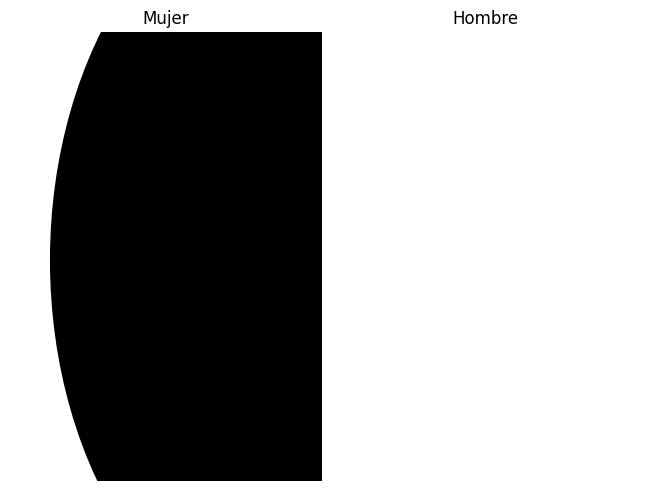

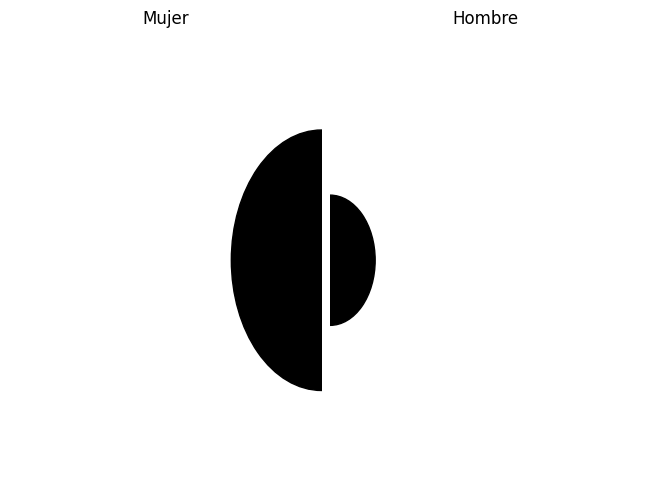

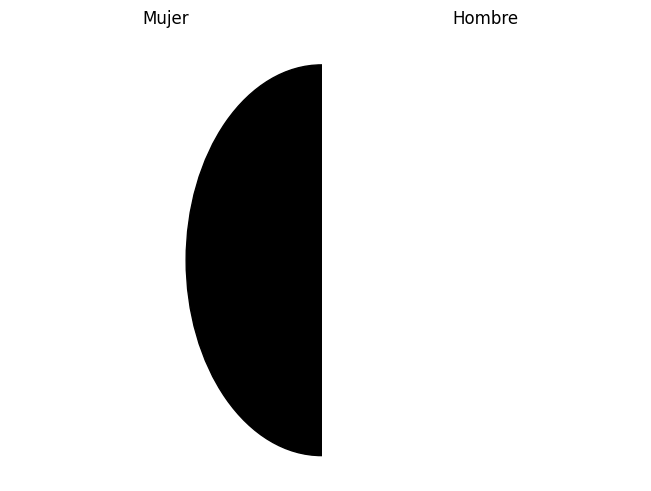

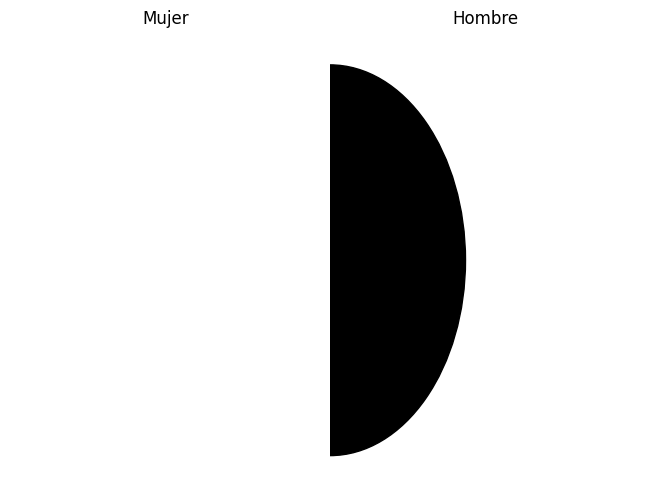

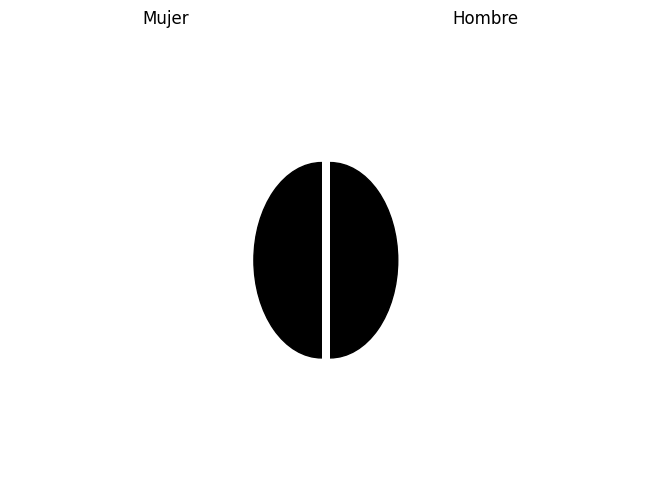

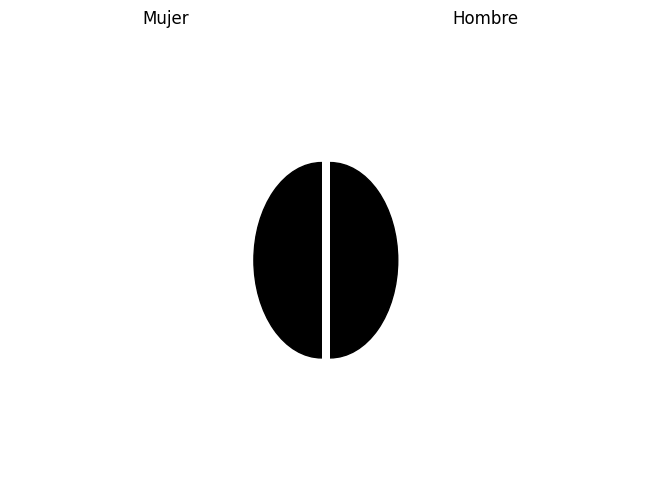

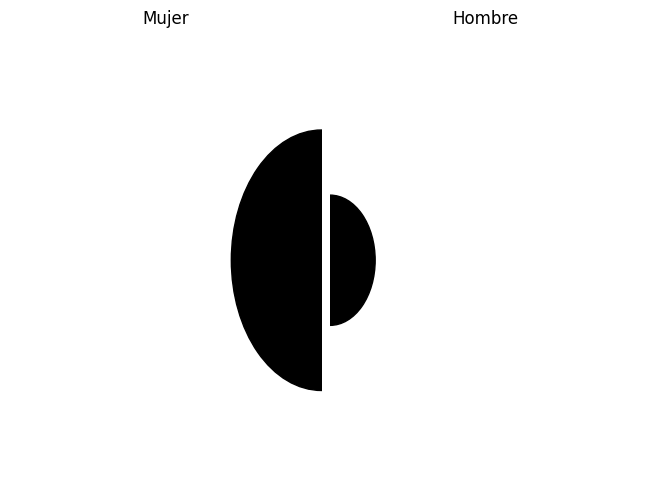

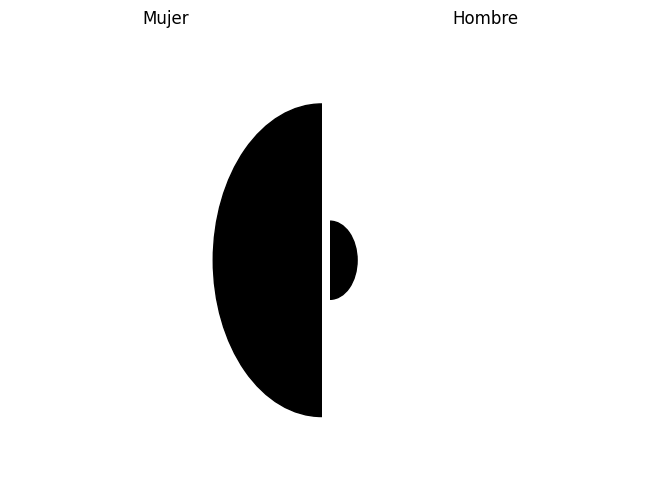

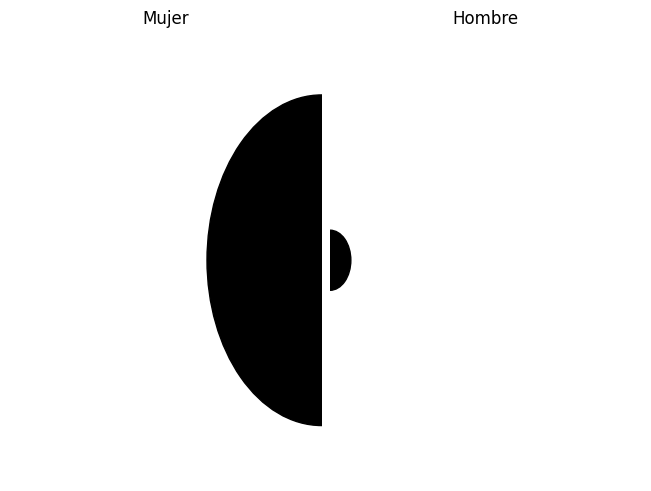

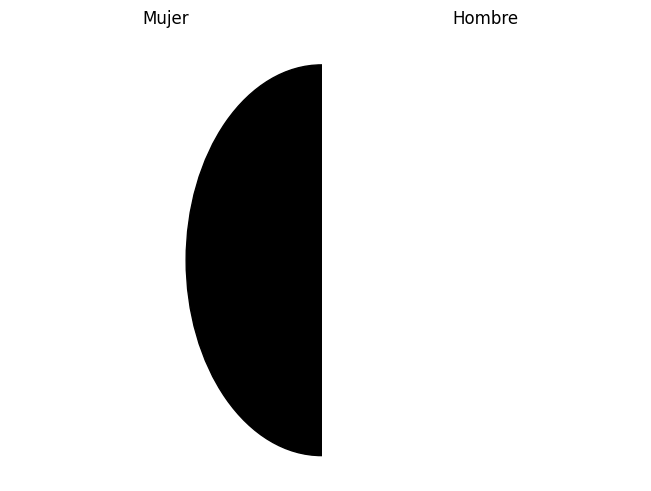

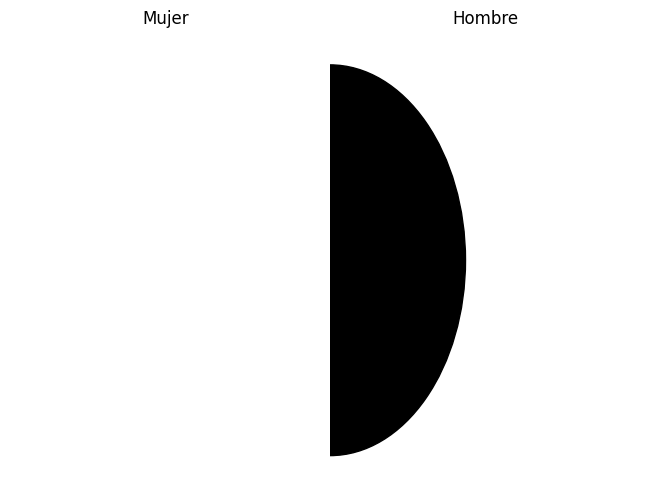

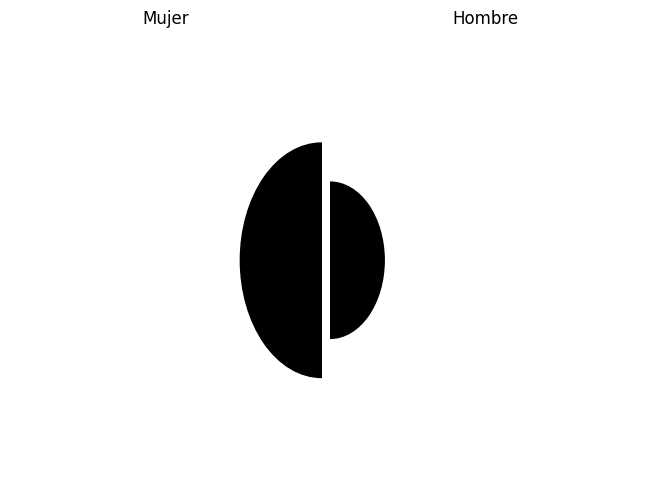

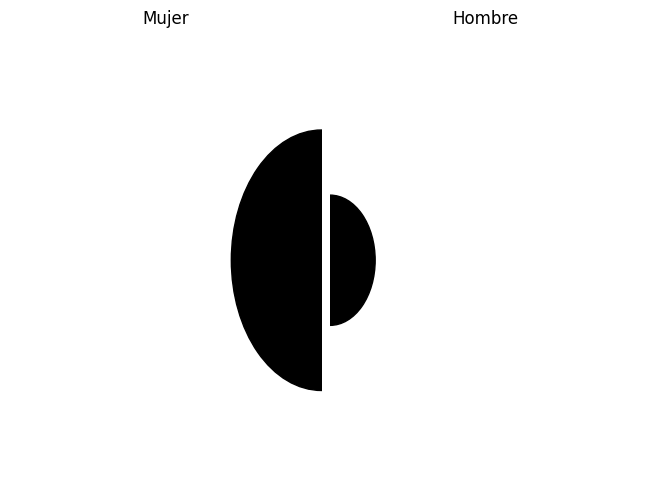

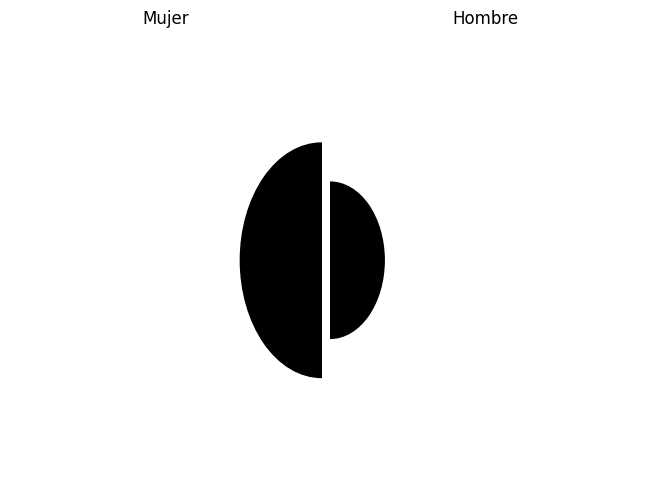

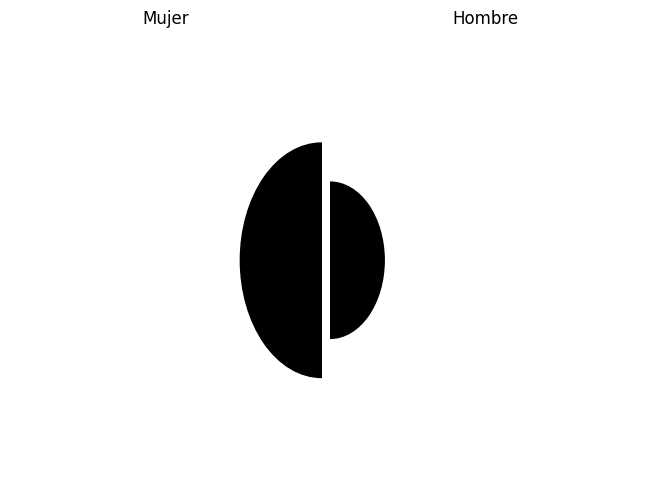

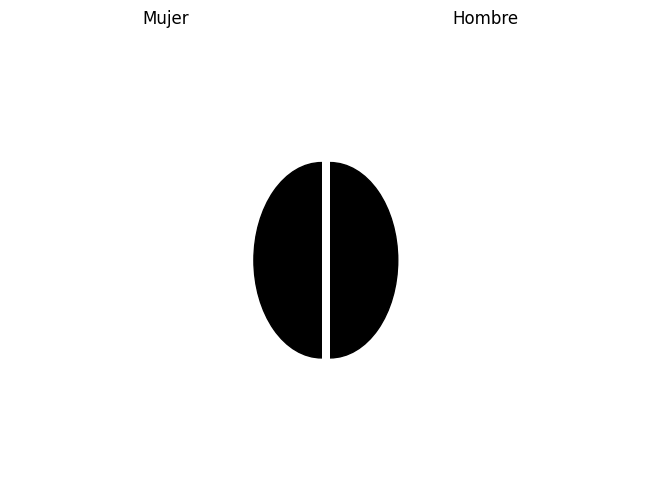

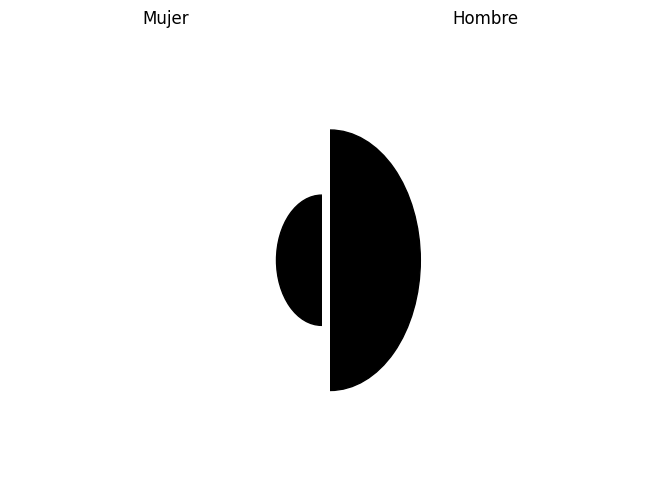

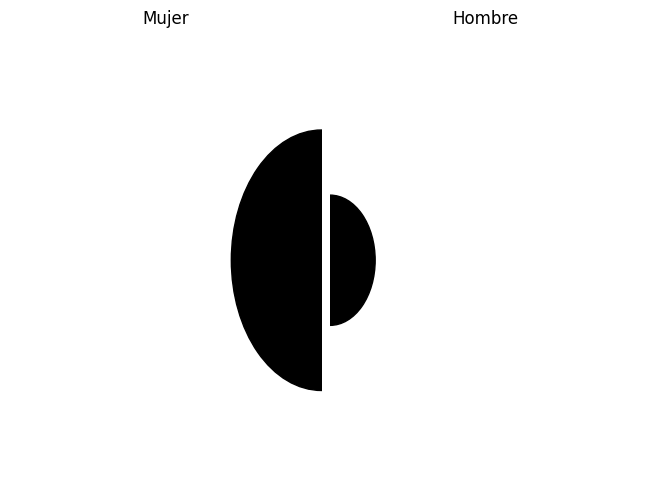

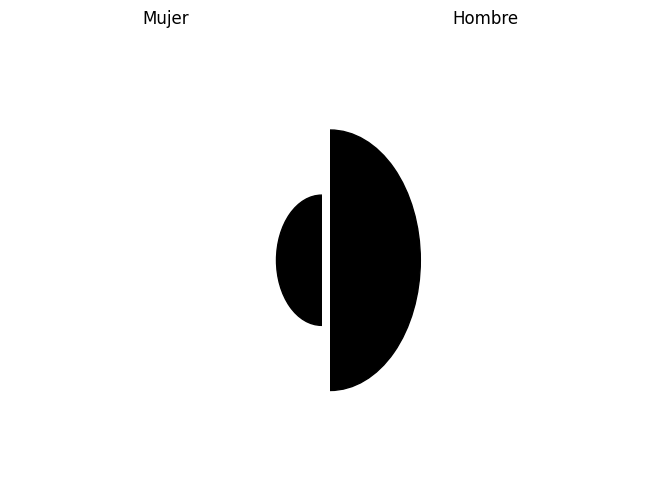

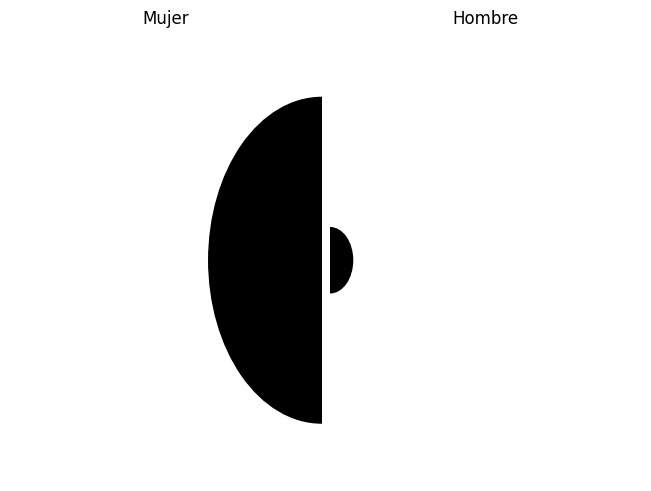

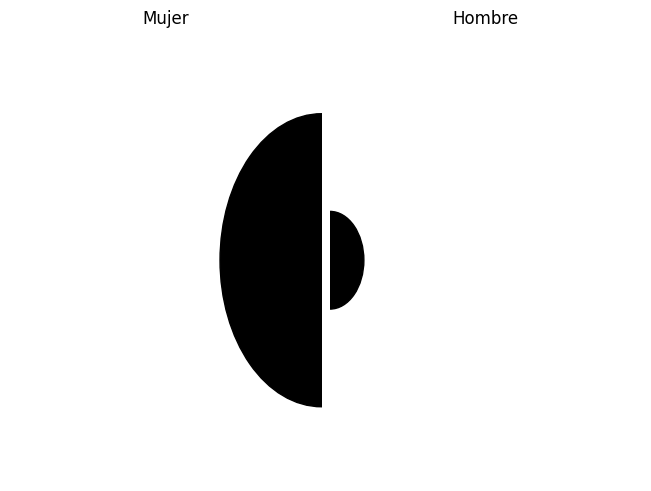

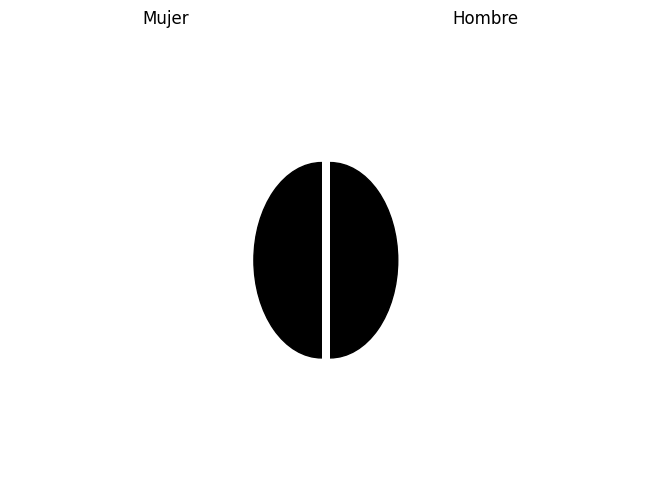

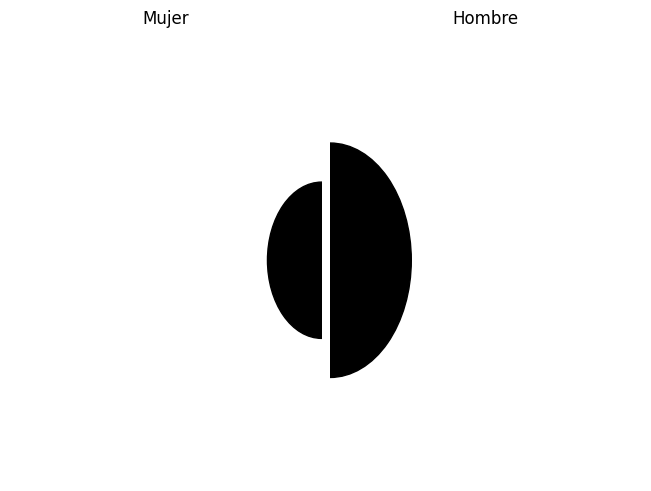

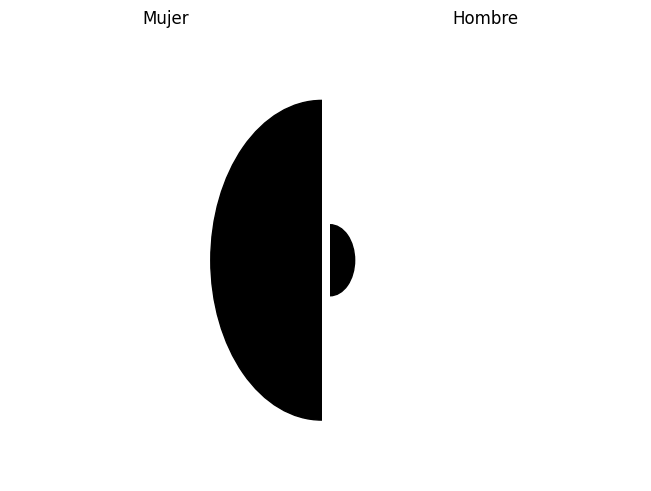

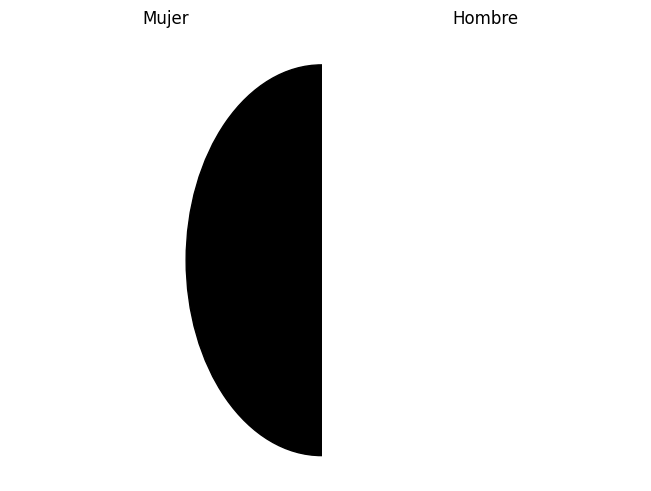

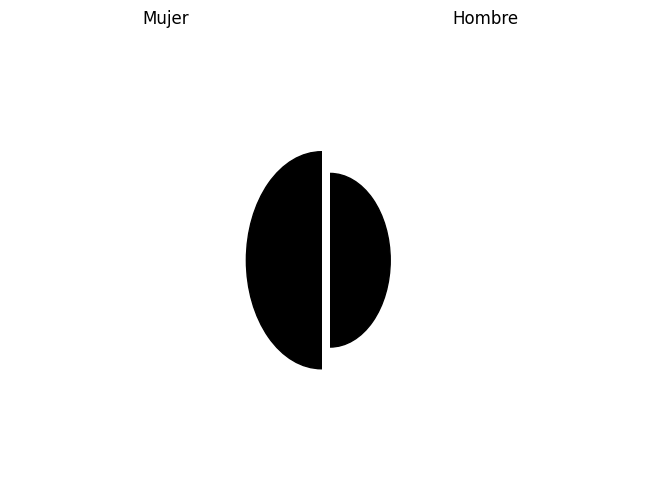

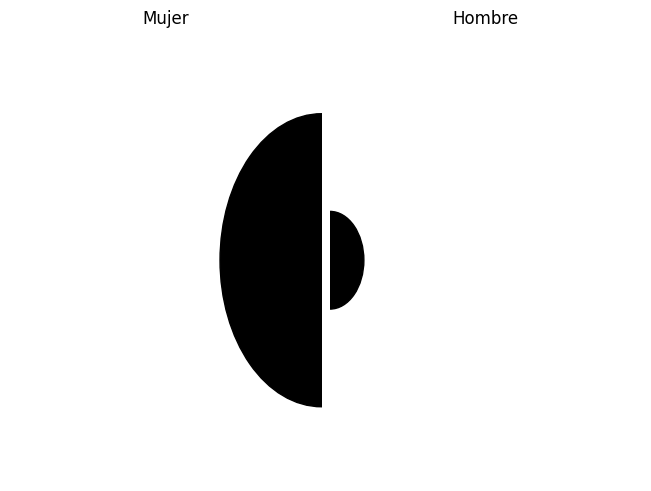

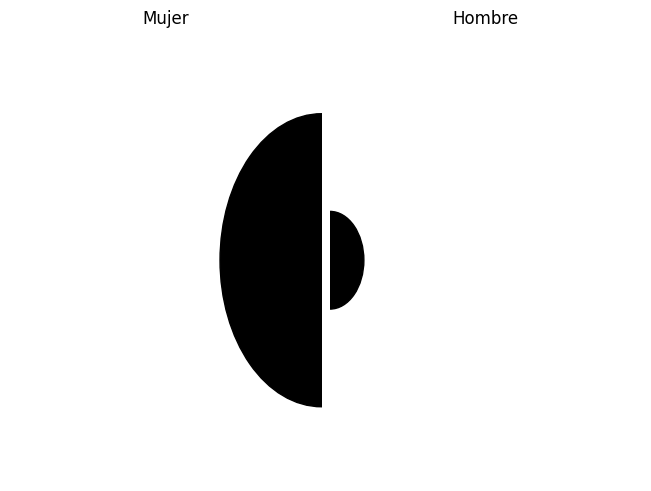

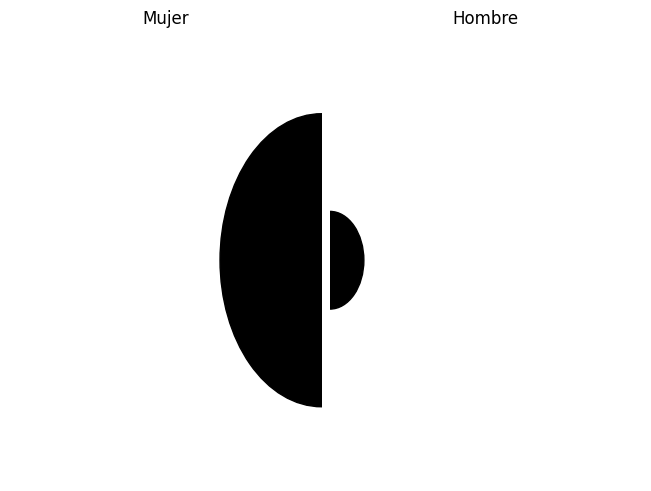

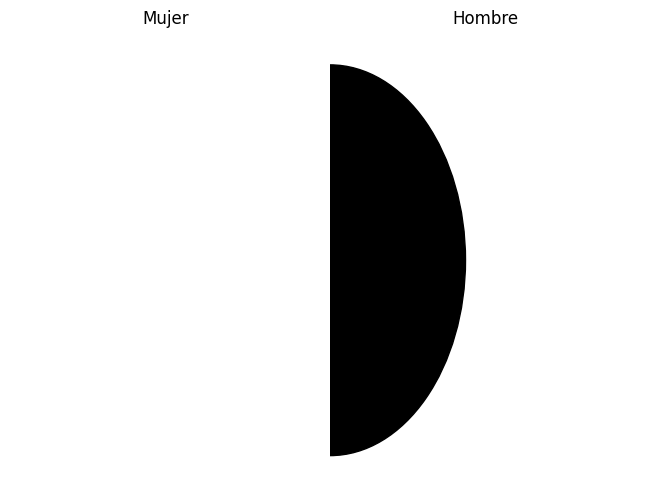

In [ ]:
#generamos la grafica de proprocion de mujeres/hombres

bajac_ps=prop_sex('Baja California')
bajac_s_ps=prop_sex('Baja California Sur')
campeche_ps=prop_sex('Campeche')
chiapas_ps=prop_sex('Chiapas')
chihuahua_ps=prop_sex('Chihuahua')
cdmx_ps=prop_sex('Ciudad de México')  #nuevo
coahuila_ps=prop_sex('Coahuila')
colima_ps=prop_sex('Colima')   #nuevo
durango_ps=prop_sex('Durango')
guanajuato_ps=prop_sex('Guanajuato')
guerrero_ps=prop_sex('Guerrero')
hidalgo_ps=prop_sex('Hidalgo')
jalisco_ps=prop_sex('Jalisco')
michoacan_ps=prop_sex('Michoacán')
morelos_ps=prop_sex('Morelos')
mexico_ps=prop_sex('México')
nayarit_ps=prop_sex('Nayarit')
nuevo_leon_ps=prop_sex('Nuevo León')
oaxaca_ps=prop_sex('Oaxaca')
puebla_ps=prop_sex('Puebla')
queretaro_ps=prop_sex('Querétaro')  #nuevo
quintanar_ps=prop_sex('Quintana Roo') # nuevo
san_luis_p_ps=prop_sex('San Luis Potosí')
sinaloa_ps=prop_sex('Sinaloa')
sonora_ps=prop_sex('Sonora')
tabasco_ps=prop_sex('Tabasco')
tamaulipas_ps=prop_sex('Tamaulipas')
tlaxcala_ps=prop_sex('Tlaxcala')
veracruz_ps=prop_sex('Veracruz')
yucatan_ps=prop_sex('Yucatán')
zacatecas_ps=prop_sex('Zacatecas')

In [ ]:
#generamos las graficas de los montos de los Estados
bajac=generar_grafica('Baja California', 'monto_rela')
campeche=generar_grafica('Campeche','monto_rela')
chiapas=generar_grafica('Chiapas','monto_rela')
chihuahua=generar_grafica('Chihuahua','monto_rela')
cdmx=generar_grafica('Ciudad de México','monto_rela')  #nuevo
coahuila=generar_grafica('Coahuila','monto_rela')
colima=generar_grafica('Colima','monto_rela')   #nuevo
durango=generar_grafica('Durango','monto_rela')
guanajuato=generar_grafica('Guanajuato','monto_rela')
guerrero=generar_grafica('Guerrero','monto_rela')
hidalgo=generar_grafica('Hidalgo','monto_rela')
jalisco=generar_grafica('Jalisco','monto_rela')
michoacan=generar_grafica('Michoacán','monto_rela')
morelos=generar_grafica('Morelos','monto_rela')
mexico=generar_grafica('México','monto_rela')
nayarit=generar_grafica('Nayarit','monto_rela')
nuevo_leon=generar_grafica('Nuevo León','monto_rela')
oaxaca=generar_grafica('Oaxaca','monto_rela')
puebla=generar_grafica('Puebla','monto_rela')
queretaro=generar_grafica('Querétaro','monto_rela')  #nuevo
quintanar=generar_grafica('Quintana Roo','monto_rela') # nuevo
san_luis_p=generar_grafica('San Luis Potosí','monto_rela')
sinaloa=generar_grafica('Sinaloa','monto_rela')
sonora=generar_grafica('Sonora','monto_rela')
tabasco=generar_grafica('Tabasco','monto_rela')
tamaulipas=generar_grafica('Tamaulipas','monto_rela')
tlaxcala=generar_grafica('Tlaxcala','monto_rela')
veracruz=generar_grafica('Veracruz','monto_rela')
yucatan=generar_grafica('Yucatán','monto_rela')
zacatecas=generar_grafica('Zacatecas','monto_rela')

In [ ]:
df_t['est']

0      Baja California
1             Campeche
2              Chiapas
3            Chihuahua
4     Ciudad de México
5             Coahuila
6               Colima
7              Durango
8           Guanajuato
9             Guerrero
10             Hidalgo
11             Jalisco
12           Michoacán
13             Morelos
14              México
15             Nayarit
16          Nuevo León
17              Oaxaca
18              Puebla
19           Querétaro
20        Quintana Roo
21     San Luis Potosí
22             Sinaloa
23              Sonora
24             Tabasco
25          Tamaulipas
26            Tlaxcala
27            Veracruz
28             Yucatán
29           Zacatecas
Name: est, dtype: object

In [ ]:
#generamos las graficas de los sexos de los Estados
bajac_sex=generar_grafica('Baja California','sex_rela')
campeche_sex=generar_grafica('Campeche','sex_rela')
chiapas_sex=generar_grafica('Chiapas','sex_rela')
chihuahua_sex=generar_grafica('Chihuahua','sex_rela')
cdmx_sex=generar_grafica('Ciudad de México', 'sex_rela')  #nuevo
coahuila_sex=generar_grafica('Coahuila','sex_rela')
colima_sex=generar_grafica('Colima','sex_rela')   #nuevo
durango_sex=generar_grafica('Durango','sex_rela')
guanajuato_sex=generar_grafica('Guanajuato','sex_rela')
guerrero_sex=generar_grafica('Guerrero','sex_rela')
hidalgo_sex=generar_grafica('Hidalgo','sex_rela')
jalisco_sex=generar_grafica('Jalisco','sex_rela')
michoacan_sex=generar_grafica('Michoacán','sex_rela')
morelos_sex=generar_grafica('Morelos','sex_rela')
mexico_sex=generar_grafica('México','sex_rela')
nayarit_sex=generar_grafica('Nayarit','sex_rela')
nuevo_leon_sex=generar_grafica('Nuevo León','sex_rela')
oaxaca_sex=generar_grafica('Oaxaca','sex_rela')
puebla_sex=generar_grafica('Puebla','sex_rela')
queretaro_sex=generar_grafica('Querétaro','sex_rela') #nuevo
quintanar_sex=generar_grafica('Quintana Roo','sex_rela') #nuevo
san_luis_p_sex=generar_grafica('San Luis Potosí','sex_rela')
sinaloa_sex=generar_grafica('Sinaloa','sex_rela')
sonora_sex=generar_grafica('Sonora','sex_rela')
tabasco_sex=generar_grafica('Tabasco','sex_rela')
tamaulipas_sex=generar_grafica('Tamaulipas','sex_rela')
tlaxcala_sex=generar_grafica('Tlaxcala','sex_rela')
veracruz_sex=generar_grafica('Veracruz','sex_rela')
yucatan_sex=generar_grafica('Yucatán','sex_rela')
zacatecas_sex=generar_grafica('Zacatecas','sex_rela')

In [ ]:
df_t.columns

Index(['est', 'm', 'h', 'monto', 'monto_estatus', 'dias_com_desfa',
       'dias_estatus', 'proy_estat', 'nom_estat', 'nombres_estatus',
       'a_c_estat', 'apoyo_x_com', 'sex_rela', 'monto_rela', 'dias_rela',
       'a_c_estatus_2', 'nombres_rela', 'nom_rela', 'monto_real',
       'dash_monto_rela', 'dias_prom', 'sex_rela_dash', 'nombre_rela_dash',
       '%_mujer', '%_hombre'],
      dtype='object')

In [ ]:
#generamos las graficas de los dias de los Estados
bajac_dias=generar_grafica('Baja California', 'dias_rela')
campeche_dias=generar_grafica('Campeche','dias_rela')
chiapas_dias=generar_grafica('Chiapas','dias_rela')
chihuahua_dias=generar_grafica('Chihuahua','dias_rela')
cdmx_dias=generar_grafica('Ciudad de México','dias_rela')  #nuevo
coahuila_dias=generar_grafica('Coahuila','dias_rela')
colima_dias=generar_grafica('Colima','dias_rela')   #nuevo
durango_dias=generar_grafica('Durango','dias_rela')
guanajuato_dias=generar_grafica('Guanajuato','dias_rela')
guerrero_dias=generar_grafica('Guerrero','dias_rela')
hidalgo_dias=generar_grafica('Hidalgo','dias_rela')
jalisco_dias=generar_grafica('Jalisco','dias_rela')
michoacan_dias=generar_grafica('Michoacán','dias_rela')
morelos_dias=generar_grafica('Morelos','dias_rela')
mexico_dias=generar_grafica('México','dias_rela')
nayarit_dias=generar_grafica('Nayarit','dias_rela')
nuevo_leon_dias=generar_grafica('Nuevo León','dias_rela')
oaxaca_dias=generar_grafica('Oaxaca','dias_rela')
puebla_dias=generar_grafica('Puebla','dias_rela')
queretaro_dias=generar_grafica('Querétaro','dias_rela')  #nuevo
quintanar_dias=generar_grafica('Quintana Roo','dias_rela') # nuevo
san_luis_p_dias=generar_grafica('San Luis Potosí','dias_rela')
sinaloa_dias=generar_grafica('Sinaloa','dias_rela')
sonora_dias=generar_grafica('Sonora','dias_rela')
tabasco_dias=generar_grafica('Tabasco','dias_rela')
tamaulipas_dias=generar_grafica('Tamaulipas','dias_rela')
tlaxcala_dias=generar_grafica('Tlaxcala','dias_rela')
veracruz_dias=generar_grafica('Veracruz','dias_rela')
yucatan_dias=generar_grafica('Yucatán','dias_rela')
zacatecas_dias=generar_grafica('Zacatecas','dias_rela')

In [ ]:
#generamos las graficas de los nombres de los Estados
bajac_nom=generar_grafica('Baja California', 'nom_rela')
campeche_nom=generar_grafica('Campeche','nom_rela')
chiapas_nom=generar_grafica('Chiapas','nom_rela')
chihuahua_nom=generar_grafica('Chihuahua','nom_rela')
cdmx_nom=generar_grafica('Ciudad de México','nom_rela')  #nuevo
coahuila_nom=generar_grafica('Coahuila','nom_rela')
colima_nom=generar_grafica('Colima','nom_rela')   #nuevo
durango_nom=generar_grafica('Durango','nom_rela')
guanajuato_nom=generar_grafica('Guanajuato','nom_rela')
guerrero_nom=generar_grafica('Guerrero','nom_rela')
hidalgo_nom=generar_grafica('Hidalgo','nom_rela')
jalisco_nom=generar_grafica('Jalisco','nom_rela')
michoacan_nom=generar_grafica('Michoacán','nom_rela')
morelos_nom=generar_grafica('Morelos','nom_rela')
mexico_nom=generar_grafica('México','nom_rela')
nayarit_nom=generar_grafica('Nayarit','nom_rela')
nuevo_leon_nom=generar_grafica('Nuevo León','nom_rela')
oaxaca_nom=generar_grafica('Oaxaca','nom_rela')
puebla_nom=generar_grafica('Puebla','nom_rela')
queretaro_nom=generar_grafica('Querétaro','nom_rela')  #nuevo
quintanar_nom=generar_grafica('Quintana Roo','nom_rela') # nuevo
san_luis_p_nom=generar_grafica('San Luis Potosí','nom_rela')
sinaloa_nom=generar_grafica('Sinaloa','nom_rela')
sonora_nom=generar_grafica('Sonora','nom_rela')
tabasco_nom=generar_grafica('Tabasco','nom_rela')
tamaulipas_nom=generar_grafica('Tamaulipas','nom_rela')
tlaxcala_nom=generar_grafica('Tlaxcala','nom_rela')
veracruz_nom=generar_grafica('Veracruz','nom_rela')
yucatan_nom=generar_grafica('Yucatán','nom_rela')
zacatecas_nom=generar_grafica('Zacatecas','nom_rela')

In [ ]:
#generamos las graficas de las 4 vertienes
graf_monto=generar_grafica_gral(clase="monto_rela",nom_barra="% Registro<br>incorrecto",titulo="Montos registrados")
graf_sexo=generar_grafica_gral(clase="sex_rela",nom_barra="Mujer",titulo="Relación sexo de los miembros de los comités")
graf_dias=generar_grafica_gral(clase="dias_rela",nom_barra="Más de 15 días", titulo="Comités que tardan más de 15 días")
graf_nombre=generar_grafica_gral(clase="nom_rela",nom_barra="registro incorrecto", titulo="Comités que registran incorrectamente los nombres")

In [ ]:
df.columns

Index(['ef_fisc', 'prog_fed', 'tip_ejec', 'nom_ejesc', 'est', 'mun', 'loc',
       'proyecto', 'cve_est', 'est.1', 'cve_mun', 'mun.1', 'cve_loc', 'loc.1',
       'fech_rec_asig', 'nom', 'cve_reg', 'fech_cons', 'h', 'm', 'Total H/M',
       'monto', 'com_uni', 'id_com_sics', 'id_proy_sics', 'apoyo_x_com',
       'fech_cap_sics', 'fech_act', 'dias_com_desfa', 'dias_estatus', 'proy_3',
       'nom_3', 'proy_estat', 'nom_estat', 'a_c_estat', 'nombres_estatus',
       'monto_e', 'monto_estatus', 'monto_bueno', 'reg_mas_13500',
       'reg_igu_13500', 'reg_men_13500', 'menos_15_dias', 'nombres_correctos',
       'nombres_incorrectos', 'sex_text'],
      dtype='object')

In [ ]:
df_dias_prom=df.groupby(by='est', as_index=False).mean()[['est','dias_com_desfa']]

<ipython-input-76-595adc6cee4a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
a={'est':['NACIONAL'],
   'dias_com_desfa':[df['dias_com_desfa'].mean()]}
a_=pd.DataFrame(a)
a_

,est,dias_com_desfa
0,NACIONAL,57.273256


In [ ]:
df_dias_prom=pd.concat([df_dias_prom, a_], ignore_index=True)
df_dias_prom=df_dias_prom.sort_values(by='dias_com_desfa', ascending=False)

In [ ]:
df_dias_prom

,est,dias_com_desfa
8,GUANAJUATO,164.615385
9,GUERRERO,150.500000
29,ZACATECAS,105.000000
21,SAN LUIS POTOSÍ,104.125000
1,CAMPECHE,95.666667
28,YUCATÁN,78.500000
23,SONORA,72.818182
10,HIDALGO,72.000000
24,TABASCO,68.000000
27,VERACRUZ DE IGNACIO DE LA LLAVE,67.375000


In [ ]:
graf_dias_prom=px.bar(data_frame=df_dias_prom,
                      x='dias_com_desfa', y='est',
                      orientation='h',
                      title='Días promedio de registro de comités.')
graf_dias_prom.update_layout(plot_bgcolor='#FFFFFF', paper_bgcolor='#FFFFFF',font={'color':'black'},
                             xaxis={'showgrid':False,
                                    'showline':False},
                             yaxis={'showgrid':False,
                                    'showline':False})

In [ ]:
df.columns

Index(['ef_fisc', 'prog_fed', 'tip_ejec', 'nom_ejesc', 'est', 'mun', 'loc',
       'proyecto', 'cve_est', 'est.1', 'cve_mun', 'mun.1', 'cve_loc', 'loc.1',
       'fech_rec_asig', 'nom', 'cve_reg', 'fech_cons', 'h', 'm', 'Total H/M',
       'monto', 'com_uni', 'id_com_sics', 'id_proy_sics', 'apoyo_x_com',
       'fech_cap_sics', 'fech_act', 'dias_com_desfa', 'dias_estatus', 'proy_3',
       'nom_3', 'proy_estat', 'nom_estat', 'a_c_estat', 'nombres_estatus',
       'monto_e', 'monto_estatus', 'monto_bueno', 'reg_mas_13500',
       'reg_igu_13500', 'reg_men_13500', 'menos_15_dias', 'nombres_correctos',
       'nombres_incorrectos', 'sex_text'],
      dtype='object')

**PROCESAMIENTO DE DATOS PETCS**

In [ ]:
df_petc.describe()

,col_sema
count,232.000000
mean,0.137931
std,0.472564
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [ ]:
df_petc['fech_ini_text']=pd.DatetimeIndex(df_petc.fech_ini).strftime("%Y-%m-%d")
df_petc['fech_fin_text']=pd.DatetimeIndex(df_petc.fech_fin).strftime("%Y-%m-%d")
df_petc['fech_real_text']=pd.DatetimeIndex(df_petc.fech_real).strftime("%Y-%m-%d")

In [ ]:
v=[]

for a,n,e in zip(df_petc.fech_ini, df_petc.fech_fin, df_petc.fech_real):
  if e > a and e < n:
    v.append(0)
  else:
    v.append(1)

df_petc['crit_1']=v

In [ ]:
app_ = Dash(__name__, suppress_callback_exceptions=True)

app_.title='Análisis registro comités'

monto_filname="/content/montos_2.jpeg"
sexo_filname="/content/sexo_2.jpeg"
dias_filname="/content/dias_2.jpeg"
nombres_filname="/content/registro.jpg"
hombre_filname="/content/Hombre.png"
mujer_filname="/content/Mujer.png"
pect_filname="/content/pect .jpeg"

e_ima_monto= base64.b64encode(open(monto_filname, 'rb').read())
e_ima_sex= base64.b64encode(open(sexo_filname, 'rb').read())
e_ima_dias= base64.b64encode(open(dias_filname, 'rb').read())
e_ima_nombres= base64.b64encode(open(nombres_filname, 'rb').read())
e_ima_hombres=base64.b64encode(open(hombre_filname, 'rb').read())
e_ima_mujeres=base64.b64encode(open(mujer_filname, 'rb').read())
e_ima_pect=base64.b64encode(open(pect_filname, 'rb').read())

e_ima_bajc=base64.b64encode(open(bajac_ps, 'rb').read())
e_ima_camp=base64.b64encode(open(campeche_ps, 'rb').read())
e_ima_chia=base64.b64encode(open(chiapas_ps, 'rb').read())
e_ima_chih=base64.b64encode(open(chihuahua_ps, 'rb').read())
e_ima_cdmx=base64.b64encode(open(cdmx_ps, 'rb').read())
e_ima_coah=base64.b64encode(open(coahuila_ps, 'rb').read())
e_ima_coli=base64.b64encode(open(colima_ps, 'rb').read())
e_ima_dura=base64.b64encode(open(durango_ps, 'rb').read())
e_ima_guan=base64.b64encode(open(guanajuato_ps, 'rb').read())
e_ima_guer=base64.b64encode(open(guerrero_ps, 'rb').read())
e_ima_hida=base64.b64encode(open(hidalgo_ps, 'rb').read())
e_ima_jali=base64.b64encode(open(jalisco_ps, 'rb').read())
e_ima_mich=base64.b64encode(open(michoacan_ps, 'rb').read())
e_ima_more=base64.b64encode(open(morelos_ps, 'rb').read())
e_ima_mexi=base64.b64encode(open(mexico_ps, 'rb').read())
e_ima_naya=base64.b64encode(open(nayarit_ps, 'rb').read())
e_ima_nule=base64.b64encode(open(nuevo_leon_ps, 'rb').read())
e_ima_oaxa=base64.b64encode(open(oaxaca_ps, 'rb').read())
e_ima_pueb=base64.b64encode(open(puebla_ps, 'rb').read())
e_ima_quer=base64.b64encode(open(queretaro_ps, 'rb').read())
e_ima_quro=base64.b64encode(open(quintanar_ps, 'rb').read())
e_ima_snlp=base64.b64encode(open(san_luis_p_ps, 'rb').read())
e_ima_sina=base64.b64encode(open(sinaloa_ps, 'rb').read())
e_ima_sono=base64.b64encode(open(sonora_ps, 'rb').read())
e_ima_taba=base64.b64encode(open(tabasco_ps, 'rb').read())
e_ima_tama=base64.b64encode(open(tamaulipas_ps, 'rb').read())
e_ima_tlax=base64.b64encode(open(tlaxcala_ps, 'rb').read())
e_ima_vera=base64.b64encode(open(veracruz_ps, 'rb').read())
e_ima_yuca=base64.b64encode(open(yucatan_ps, 'rb').read())
e_ima_zaca=base64.b64encode(open(zacatecas_ps, 'rb').read())



app_.layout= html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div(id='page-content')
])

index_page=html.Div([

    html.Div([
        html.Div([
        html.Div(children=[
            html.H1('Análisis de los registros de los comités en el SICS.'),
            html.H2('Fecha de corte: 18/Diciembre/2023') #cambiar la fecha segun el corte
        ])
    ], style={'text-align':'center', 'color':'black', 'font-family':'Montserrat', 'font-size':'12px'}),

    html.Div([
        html.Div(children=[
            html.H2('Comités constituidos: {}'.format(df['apoyo_x_com'].sum()))
        ])
    ], style={'text-align':'center', 'color':'black'}),

    html.Div([
        html.Div(children=[
            html.H3('Seleccione una opción:')
        ])
    ],style={'text-align':'center','color':'black'})
    ]),

    html.Div([

        html.Div(children=[
            html.H3('Resgitro de los montos de apoyo.'),
            html.Br(),
            dcc.Link(href='/monto', children=[
                html.Img(src='data:image/jpg;base64,{}'.format(e_ima_monto.decode()),
                         style={'width':'50%',
                                'height':'50%'})
            ])
        ], style={'padding':10,'flex':1,'color':'black', 'text-align':'center'}),

        html.Div(children=[
            html.H3('Relación mujer hombre.'),
            html.Br(),
            dcc.Link(href='/sexo', children=[
                html.Img(src='data:image/jpg;base64,{}'.format(e_ima_sex.decode()),
                         style={'width':'50%',
                                'height':'50%'})
          ])
        ], style={'padding':10,'flex':1,'color':'black', 'text-align':'center'}),

        html.Div(children=[
            html.H3('Tiempo de registro fuera de la normatividad.'),
            html.Br(),
            dcc.Link(href='/dias', children=[
                html.Img(src='data:image/jpg;base64,{}'.format(e_ima_dias.decode()),
                         style={'width':'50%',
                                'height':'50%'})
            ])
        ], style={'padding':10,'flex':1, 'color':'black', 'text-align':'center'}),

        html.Div(children=[
            html.H3('Registro de los nombres de los comités.'),
            dcc.Link(href='/nombres', children=[
                html.Img(src='data:image/jpg;base64,{}'.format(e_ima_nombres.decode()),
                         style={'width':'50%',
                                'height':'50%'})
            ])
        ], style={'padding':10,'flex':1, 'color':'black', 'text-align':'center'})

    ], style={'display':'flex', 'flexDirection':'row'}),

    html.Div([
        html.Div(children=[], style={'padding':10,'flex':1}),
        html.Div(children=[], style={'padding':10,'flex':1}),
        html.Div(children=[
            html.H3('Registro PETC.'),
            dcc.Link(href='/pect', children=[
                html.Img(src='data:image/jpg;base64,{}'.format(e_ima_pect.decode()),
                         style={'width':'50%',
                                'height':'50%'})
            ])
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),
        html.Div(children=[], style={'padding':10,'flex':1}),
        html.Div(children=[], style={'padding':10,'flex':1}),
    ], style={'display':'flex','flexDirection':'row'})

], style={'backgroundColor':'white'})

monto_page=html.Div([

    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'}),

    #montos general
    html.Div(style={'text-align':'center','color':'black'},children=[
        html.H2('Montos registrados de los comités constituidos.'),
        dcc.Graph(id='grafica_montos',
                  figure=graf_monto)
    ]),

    #BAJA CALIFORNIA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Baja California')
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-bajac',
                      figure=bajac)
        ], id='loc_bc_monto', style={'padding':10,'flex':1,'color':'black'}),

        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='BAJA CALIFORNIA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='BAJA CALIFORNIA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='BAJA CALIFORNIA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='BAJA CALIFORNIA']['reg_men_13500'].sum())),
            html.Br(),

            generar_tabla_monto('BAJA CALIFORNIA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="BAJA CALIFORNIA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )

        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17}),
    ],id='bc_monto', style={'display':'flex','flexDirection':'row'}),

    #CAMPECHE
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Campeche')
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-campeche',
                      figure=campeche)
        ], style={'padding':10,'flex':1,'color':'black'}),

        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CAMPECHE']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='CAMPECHE']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='CAMPECHE']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='CAMPECHE']['reg_men_13500'].sum())),
            html.Br(),

            generar_tabla_monto('CAMPECHE'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="CAMPECHE"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )

        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17}),
    ],id='camp_monto', style={'display':'flex','flexDirection':'row'}),

    #CHIAPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chiapas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-chiapas',
                      figure=chiapas)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CHIAPAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='CHIAPAS']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='CHIAPAS']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='CHIAPAS']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('CHIAPAS'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="CHIAPAS"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='chia_monto', style={'display':'flex','flexDirection':'row'}),

    #CHIHUAHUA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chihuahua')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-chihuahua',
                      figure=chihuahua)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CHIHUAHUA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='CHIHUAHUA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='CHIHUAHUA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='CHIHUAHUA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('CHIHUAHUA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="CHIHUAHUA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='chih_monto', style={'display':'flex','flexDirection':'row'}),

    #Ciudad de méxico
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('CDMX')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-cdmx',
                      figure=cdmx)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='cdmx_monto', style={'display':'flex','flexDirection':'row'}),

    #COAHUILA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Coahuila')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-coahuila',
                      figure=coahuila)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('COAHUILA DE ZARAGOZA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="COAHUILA DE ZARAGOZA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='coah_monto', style={'display':'flex','flexDirection':'row'}),

    #COLIMA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Colima')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-colima',
                      figure=colima)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='COLIMA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='COLIMA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='COLIMA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='COLIMA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('COLIMA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="COLIMA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='coli_monto', style={'display':'flex','flexDirection':'row'}),

    #DURANGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Durango')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-durango',
                      figure=durango)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='DURANGO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='DURANGO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='DURANGO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='DURANGO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('DURANGO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="DURANGO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='dura_monto', style={'display':'flex','flexDirection':'row'}),

    #GUANAJUATO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guanajuato')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-guanajuato',
                      figure=guanajuato)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='GUANAJUATO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='GUANAJUATO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='GUANAJUATO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='GUANAJUATO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('GUANAJUATO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="GUANAJUATO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='guan_monto', style={'display':'flex','flexDirection':'row'}),

    #GUERRERO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guerrero')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-guerrero',
                      figure=guerrero)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='GUERRERO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='GUERRERO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='GUERRERO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='GUERRERO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('GUERRERO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="GUERRERO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='guer_monto', style={'display':'flex','flexDirection':'row'}),

    #HIDALGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Hidalgo')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-hidalgo',
                      figure=hidalgo)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='HIDALGO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='HIDALGO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='HIDALGO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='HIDALGO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('HIDALGO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="HIDALGO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='hida_monto', style={'display':'flex','flexDirection':'row'}),

    #JALISCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Jalisco')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-jalisco',
                      figure=jalisco)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='JALISCO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='JALISCO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='JALISCO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='JALISCO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('JALISCO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="JALISCO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='jali_monto', style={'display':'flex','flexDirection':'row'}),

    #MICHOACAN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Michoacán')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-michoacan',
                      figure=michoacan)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('MICHOACÁN DE OCAMPO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="MICHOACÁN DE OCAMPO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='mich_monto', style={'display':'flex','flexDirection':'row'}),

    #MORELOS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Morelos')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-morelos',
                      figure=morelos)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MORELOS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='MORELOS']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='MORELOS']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='MORELOS']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('MORELOS'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="MORELOS"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='more_monto', style={'display':'flex','flexDirection':'row'}),

    #MEXICO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Estado de México')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-mexico',
                      figure=mexico)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MÉXICO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='MÉXICO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='MÉXICO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='MÉXICO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('MÉXICO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="MÉXICO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='esmx_monto', style={'display':'flex','flexDirection':'row'}),

    #NAYARIT
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nayarit')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-naya',
                      figure=nayarit)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='NAYARIT']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='NAYARIT']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='NAYARIT']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='NAYARIT']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('NAYARIT'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="NAYARIT"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='naya_monto', style={'display':'flex','flexDirection':'row'}),

    #NUEVO LEÓN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nuevo León')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-nl',
                      figure=nuevo_leon)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='NUEVO LEÓN']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='NUEVO LEÓN']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='NUEVO LEÓN']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='NUEVO LEÓN']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('NUEVO LEÓN'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="NUEVO LEÓN"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='nule_monto', style={'display':'flex','flexDirection':'row'}),

    #OAXACA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Oaxaca')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-oax',
                      figure=oaxaca)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='OAXACA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='OAXACA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='OAXACA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='OAXACA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('OAXACA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="OAXACA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255))',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='oaxa_monto', style={'display':'flex','flexDirection':'row'}),

    #PUEBLA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Puebla')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-pue',
                      figure=puebla)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='PUEBLA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='PUEBLA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='PUEBLA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='PUEBLA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('PUEBLA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="PUEBLA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='pueb_monto', style={'display':'flex','flexDirection':'row'}),

    #QUERETARO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Querétaro')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-quere',
                      figure=queretaro)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='QUERÉTARO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='QUERÉTARO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='QUERÉTARO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='QUERÉTARO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('QUERÉTARO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="QUERÉTARO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='quer_monto', style={'display':'flex','flexDirection':'row'}),

    #QUINTANA ROO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Quintana Roo')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-qr',
                      figure=quintanar)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='QUINTANA ROO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='QUINTANA ROO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='QUINTANA ROO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='QUINTANA ROO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('QUINTANA ROO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="QUINTANA ROO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='quro_monto', style={'display':'flex','flexDirection':'row'}),

    #SLP
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('San Luis Potosí')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-slp',
                      figure=san_luis_p)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('SAN LUIS POTOSÍ'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="SAN LUIS POTOSÍ"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='snlp_monto', style={'display':'flex','flexDirection':'row'}),

    #SINALOA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sinaloa')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-sin',
                      figure=sinaloa)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SINALOA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='SINALOA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='SINALOA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='SINALOA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('SINALOA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="SINALOA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='sina_monto', style={'display':'flex','flexDirection':'row'}),

    #SONORA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sonora')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-son',
                      figure=sonora)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SONORA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='SONORA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='SONORA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='SONORA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('SONORA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="SONORA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='sono_monto', style={'display':'flex','flexDirection':'row'}),

    #TABASCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tabasco')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-tab',
                      figure=tabasco)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TABASCO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='TABASCO']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='TABASCO']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='TABASCO']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('TABASCO'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="TABASCO"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='taba_monto', style={'display':'flex','flexDirection':'row'}),

    #TAMAULIPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tamaulipas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-tam',
                      figure=tamaulipas)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TAMAULIPAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='TAMAULIPAS']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='TAMAULIPAS']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='TAMAULIPAS']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('TAMAULIPAS'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="TAMAULIPAS"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='tama_monto', style={'display':'flex','flexDirection':'row'}),

    #TLAXCALA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tlaxcala')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-tlax',
                      figure=tlaxcala)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TLAXCALA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='TLAXCALA']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='TLAXCALA']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='TLAXCALA']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('TLAXCALA'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="TLAXCALA"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='tlax_monto', style={'display':'flex','flexDirection':'row'}),

    #VERACRUZ
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Veracruz')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-vera',
                      figure=veracruz)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('VERACRUZ DE IGNACIO DE LA LLAVE'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="VERACRUZ DE IGNACIO DE LA LLAVE"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='vera_monto', style={'display':'flex','flexDirection':'row'}),

    #YUCATAN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Yucatán')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-yuc',
                      figure=yucatan)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='YUCATÁN']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='YUCATÁN']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='YUCATÁN']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='YUCATÁN']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('YUCATÁN'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="YUCATÁN"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ],id='yuca_monto', style={'display':'flex','flexDirection':'row'}),

    #ZACATECAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Zacatecas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-monto-zac',
                      figure=zacatecas)
        ], style={'padding':10,'flex':1,'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='ZACATECAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con más de $13,500: {}'.format(df[df['est']=='ZACATECAS']['reg_mas_13500'].sum())),
            html.Br(),
            html.Label('Comités con registro correcto: {}'.format(df[df['est']=='ZACATECAS']['reg_igu_13500'].sum())),
            html.Br(),
            html.Label('Comités con menos de $13,500: {}'.format(df[df['est']=='ZACATECAS']['reg_men_13500'].sum())),
            html.Br(),
            generar_tabla_monto('ZACATECAS'),

            html.Br(),

            dash_table.DataTable(
                data=df_totales[df_totales['est']=="ZACATECAS"].to_dict('records'),
                columns=[
                    {'name':'Total', 'id':'est', 'type':'text'},
                    {'name':' ','id':'monto','type':'numeric','format':money}
                ],
                style_cell={
                    'textAlign':'left',
                    'fontSize':17
                },
                style_header={
                    'border':'1px black',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black',
                    'fontWeight':'bold'
                },
                style_data={
                    'border':'1px black',
                    'whiteSpace':'auto',
                    'backgroundColor':'rgb(255,255,255)',
                    'color':'black'
                }
            )
        ], style={'padding':10, 'flex':1,'color':'black','fontSize':17})
    ], style={'display':'flex','flexDirection':'row'}),

    html.Div(children=[
        html.H2('Resumen de los totales.'),
        html.Br(),
        dash_table.DataTable(
            data=df_totales.to_dict('records'),
            columns=[
                {'name':'Estado','id':'est','type':'text'},
                {'name':'Monto total','id':'monto', 'type':'numeric','format':money}
            ],
            style_cell={
                'textAlign':'left',
                'fontSize':17
            },
            style_header={
                'border':'1px black',
                'backgroundColor':'rgb(212,193,156)',
                'color':'black',
                'fontWeight':'bold'
            },
            style_data={
                'border':'1px black',
                'whiteSpace':'auto',
                'backgroundColor':'rgb(255,255,255)',
                'color':'black'
            }
        ),
        html.H3('Gran total: ${:,.2f}'.format(df_totales['monto'].sum()))
    ],id='zaca_monto', style={'text-align':'center','color':'black'}),

    html.Br(),
    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'})

], style={'backgroundColor':'white', 'border-color':'white'})

sexo_page=html.Div([
    # SEXO

    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'}),

    html.Div([
        html.Div([
            html.Div(children=[
                html.H1('Relación mujer hombre de los comités constituidos.')
            ], style={'text-align':'center'})
        ]),

        html.Div(children=[
            dcc.Graph(figure=fig_e)
        ])

    ]),

    #BAJA CALIFORNIA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Baja California')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="BAJA CALIFORNIA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-bajac',
                      figure=bajac_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='BAJA CALIFORNIA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='BAJA CALIFORNIA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_bajc.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #CAMPECHE
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Campeche')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="CAMPECHE"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-campeche',
                      figure=campeche_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='CAMPECHE']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='CAMPECHE']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_camp.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #CHIAPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chiapas')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="CHIAPAS"]['m'].count()))
    ]),
#
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-chiapas',
                      figure=chiapas_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='CHIAPAS']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='CHIAPAS']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_chia.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'}) #

    ], style={'display':'flex','flexDirection':'row'}),

    #CHIHUAHUA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chihuahua')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="CHIHUAHUA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-chihuahua',
                      figure=chihuahua_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='CHIHUAHUA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='CHIHUAHUA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_chih.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #CDMX
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('CDMX')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-cdmx',
                      figure=cdmx_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_cdmx.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #COAHUILA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Coahuila')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="COAHUILA DE ZARAGOZA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-coahuila',
                      figure=coahuila_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_coah.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #COLIMA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Colima')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="COLIMA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-colima',
                      figure=colima_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='COLIMA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='COLIMA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_coli.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #DURANGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Durango')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="DURANGO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-durango',
                      figure=durango_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='DURANGO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='DURANGO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_dura.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #GUANAJUATO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guanajuato')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="GUANAJUATO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-guanajuato',
                      figure=guanajuato_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='GUANAJUATO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='GUANAJUATO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_guan.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #GUERRERO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guerrero')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="GUERRERO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-guerrero',
                      figure=guerrero_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='GUERRERO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='GUERRERO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_guer.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #HIDALGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Hidalgo')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="HIDALGO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-hidalgo',
                      figure=hidalgo_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='HIDALGO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='HIDALGO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_hida.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #JALISCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Jalisco')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="JALISCO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-jalisco',
                      figure=jalisco_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='JALISCO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='JALISCO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_jali.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #MICHOACÁN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Michoacán')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="MICHOACÁN DE OCAMPO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-michoacan',
                      figure=michoacan_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_mich.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #MORELOS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Morelos')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="MORELOS"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-morelos',
                      figure=morelos_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='MORELOS']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='MORELOS']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_more.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #MEXICO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Estado de México')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="MÉXICO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-edomex',
                      figure=mexico_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='MÉXICO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='MÉXICO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_mexi.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #NAYARIT
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nayarit')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="NAYARIT"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-nayarit',
                      figure=nayarit_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='NAYARIT']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='NAYARIT']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_naya.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #NUEVO LEÓN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nuevo León')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="NUEVO LEÓN"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-nuevoleon',
                      figure=nuevo_leon_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='NUEVO LEÓN']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='NUEVO LEÓN']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_nule.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #OAXACA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Oaxaca')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="OAXACA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-oaxaca',
                      figure=oaxaca_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='OAXACA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='OAXACA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_oaxa.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #PUEBLA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Puebla')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="PUEBLA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-puebla',
                      figure=puebla_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='PUEBLA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='PUEBLA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_pueb.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #QUERÉTARO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Querétaro')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="QUERÉTARO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-quere',
                      figure=queretaro_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='QUERÉTARO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='QUERÉTARO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_quer.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #QUINTANA ROO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Quintana Roo')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="QUINTANA ROO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-puebla',
                      figure=quintanar_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='QUINTANA ROO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='QUINTANA ROO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_quro.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #SLP
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('San Luis Potosí')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="SAN LUIS POTOSÍ"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-slp',
                      figure=san_luis_p_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_snlp.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #SINALOA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sinaloa')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="SINALOA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-sinaloa',
                      figure=sinaloa_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='SINALOA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='SINALOA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_sina.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #SONORA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sonora')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="SONORA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-sonora',
                      figure=sonora_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='SONORA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='SONORA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_sono.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #TABASCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tabasco')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="TABASCO"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-tabas',
                      figure=tabasco_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='TABASCO']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='TABASCO']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_taba.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #TAMAULIPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tamaulipas')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="TAMAULIPAS"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-tamaulipas',
                      figure=tamaulipas_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='TAMAULIPAS']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='TAMAULIPAS']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_tama.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #TLAXCALA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tlaxcala')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="TLAXCALA"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-tlaxcala',
                      figure=tlaxcala_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='TLAXCALA']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='TLAXCALA']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_tlax.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #VERACRUZ
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Veracruz')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="VERACRUZ DE IGNACIO DE LA LLAVE"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-veracruz',
                      figure=veracruz_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_vera.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #YUCATÁN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Yucatán')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="YUCATÁN"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-yucatan',
                      figure=yucatan_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='YUCATÁN']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='YUCATÁN']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_yuca.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    #ZACATECAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Zacatecas')
    ]),

    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H3('Comités constituidos: {}'.format(df[df['est']=="ZACATECAS"]['m'].count()))
    ]),

    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(id='grafico-sexo-zacatecas',
                      figure=zacatecas_sex)
        ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

        html.Div(children=[

            html.Div(children=[

                html.Div(children=[
                    html.H2('Total mujeres: {}'.format(df[df['est']=='ZACATECAS']['m'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'}),

                html.Div(children=[
                    html.H2('Total hombres: {}'.format(df[df['est']=='ZACATECAS']['h'].sum()))
                ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

            ], style={'display':'flex','flexDirection':'row','padding':10,'flex':1,'color':'black','text-align':'center'}),

            html.Div(children=[

                html.Div(children=[
                    html.Img(src='data:image/jpg;base64,{}'.format(e_ima_zaca.decode()))
                ])

            ], style={'padding':10,'flex':1,'color':'black','text-align':'center'})

        ], style={'padding':10,'flex':1,'color':'black','text-align':'center','display':'flex','flexDirection':'column'})

    ], style={'display':'flex','flexDirection':'row'}),

    html.Br(),
    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'})

], style={'backgroundColor':'white', 'border-color':'white'})

dias_page=html.Div([
    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'}),
    html.Br(),

    html.Div(children=[
        html.H1('Comités registrados fuera de normatividad.')
    ], style={'text-align':'center','color':'black'}),

    html.Div(children=[
        html.H1('Campeche'),
        dcc.Graph(figure=graf_dias)
    ]),

    html.Div(style={'text-align':'center'},children=[
        dcc.Graph(figure=graf_dias_prom)
    ]),

    #BAJA CALIFORNIA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Baja California')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=bajac_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='BAJA CALIFORNIA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='BAJA CALIFORNIA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='BAJA CALIFORNIA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="BAJA CALIFORNIA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('BAJA CALIFORNIA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})

    ], style={'display':'flex', 'flexDirection':'row'}),

    #CAMPECHE
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Campeche')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=campeche_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CAMPECHE']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='CAMPECHE']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='CAMPECHE']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="CAMPECHE"]['dias_com_desfa'].mean())),

            generar_tabla_dias('CAMPECHE')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})

    ], style={'display':'flex', 'flexDirection':'row'}),

    #CHIAPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chiapas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=chiapas_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CHIAPAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='CHIAPAS']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='CHIAPAS']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="CHIAPAS"]['dias_com_desfa'].mean())),

            generar_tabla_dias('CHIAPAS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #CHIHUAHUA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chihuahua')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=chihuahua_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CHIHUAHUA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='CHIHUAHUA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='CHIHUAHUA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="CHIHUAHUA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('CHIHUAHUA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #CDMX
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('CDMX')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=cdmx_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)"]['dias_com_desfa'].mean())),

            generar_tabla_dias('CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #COAHUILA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Coahuila de Zaragoza')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=coahuila_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="COAHUILA DE ZARAGOZA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('COAHUILA DE ZARAGOZA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #COLIMA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Colima')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=colima_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='COLIMA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='COLIMA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='COLIMA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="COLIMA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('COLIMA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #DURANGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Durango')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=durango_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='DURANGO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='DURANGO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='DURANGO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="DURANGO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('DURANGO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #GUANAJUATO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guanajuato')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=guanajuato_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='GUANAJUATO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='GUANAJUATO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='GUANAJUATO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="GUANAJUATO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('GUANAJUATO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #GUERRERO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guerrero')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=guerrero_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='GUERRERO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='GUERRERO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='GUERRERO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="GUERRERO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('GUERRERO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #HIDALGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Hidalgo')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=hidalgo_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='HIDALGO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='HIDALGO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='HIDALGO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="HIDALGO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('HIDALGO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #JALISCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Jalisco')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=jalisco_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='JALISCO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='JALISCO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='JALISCO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="JALISCO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('JALISCO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #Edo Mex
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Estado de México')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=mexico_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MÉXICO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='MÉXICO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='MÉXICO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="MÉXICO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('MÉXICO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #Michoacan
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Michoacan')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=michoacan_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="MICHOACÁN DE OCAMPO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('MICHOACÁN DE OCAMPO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #Morelos
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Morelos')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=morelos_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MORELOS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='MORELOS']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='MORELOS']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="MORELOS"]['dias_com_desfa'].mean())),

            generar_tabla_dias('MORELOS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #Nayarit
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nayarit')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=nayarit_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='NAYARIT']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='NAYARIT']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='NAYARIT']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="NAYARIT"]['dias_com_desfa'].mean())),

            generar_tabla_dias('NAYARIT')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #Nuevo León
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nuevo León')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=nuevo_leon_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='NUEVO LEÓN']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='NUEVO LEÓN']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='NUEVO LEÓN']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="NUEVO LEÓN"]['dias_com_desfa'].mean())),

            generar_tabla_dias('NUEVO LEÓN')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #OAXACA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Oaxaca')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=oaxaca_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='OAXACA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='OAXACA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='OAXACA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="OAXACA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('OAXACA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #Puebla
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Puebla')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=puebla_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='PUEBLA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='PUEBLA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='PUEBLA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="PUEBLA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('PUEBLA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #QUERETARO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Querétaro')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=queretaro_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='QUERÉTARO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='QUERÉTARO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='QUERÉTARO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="QUERÉTARO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('QUERÉTARO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #QUINTANA ROO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Quintana Roo')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=quintanar_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='QUINTANA ROO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='QUINTANA ROO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='QUINTANA ROO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="QUINTANA ROO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('QUINTANA ROO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #SLP
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('San Luis Potosí')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=san_luis_p_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="SAN LUIS POTOSÍ"]['dias_com_desfa'].mean())),

            generar_tabla_dias('SAN LUIS POTOSÍ')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #SINALOA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sinaloa')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=sinaloa_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SINALOA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='SINALOA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='SINALOA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="SINALOA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('SINALOA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #SONORA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sonora')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=sonora_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SONORA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='SONORA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='SONORA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="SONORA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('SONORA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #TABASCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tabasco')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=tabasco_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TABASCO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='TABASCO']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='TABASCO']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="TABASCO"]['dias_com_desfa'].mean())),

            generar_tabla_dias('TABASCO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #TAMAULIPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tamaulipas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=tamaulipas_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TAMAULIPAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='TAMAULIPAS']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='TAMAULIPAS']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="TAMAULIPAS"]['dias_com_desfa'].mean())),

            generar_tabla_dias('TAMAULIPAS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #TLAXCALA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tlaxcala')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=tlaxcala_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TLAXCALA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='TLAXCALA']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='TLAXCALA']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="TLAXCALA"]['dias_com_desfa'].mean())),

            generar_tabla_dias('TLAXCALA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #VERACRUZ
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Veracruz')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=veracruz_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="VERACRUZ DE IGNACIO DE LA LLAVE"]['dias_com_desfa'].mean())),

            generar_tabla_dias('VERACRUZ DE IGNACIO DE LA LLAVE')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #YUCATAN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Yucatán')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=yucatan_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='YUCATÁN']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='YUCATÁN']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='YUCATÁN']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="YUCATÁN"]['dias_com_desfa'].mean())),

            generar_tabla_dias('YUCATÁN')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #ZACATECAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Zacatecas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=zacatecas_dias)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='ZACATECAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités que registran después de 15 días: {}'.format(df[df['est']=='ZACATECAS']['dias_estatus'].sum())),
            html.Br(),
            html.Label('Comités que registran a tiempo: {}'.format(df[df['est']=='ZACATECAS']['menos_15_dias'].sum())),
            html.Br(),

            html.H2('Promedio de días: {:.0f}'.format(df[df['est']=="ZACATECAS"]['dias_com_desfa'].mean())),

            generar_tabla_dias('ZACATECAS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    html.Br(),
    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'}),

], style={'backgroundColor':'white', 'border-color':'white'})

#pagina nombres
nombres_page=html.Div([
    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'}),
    html.Br(),

    html.Div([
        html.Div(children=[
            html.H1('Registro de los nombre de los comités constituidos.')
        ])
    ], style={'text-align':'center','color':'black'}),

    html.Div(children=[
        dcc.Graph(figure=graf_nombre)
    ]),

    #BAJA CALIFORNIA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Baja California')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=bajac_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='BAJA CALIFORNIA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='BAJA CALIFORNIA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='BAJA CALIFORNIA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('BAJA CALIFORNIA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #CAMPECHE
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Campeche')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=campeche_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CAMPECHE']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='CAMPECHE']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='CAMPECHE']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('CAMPECHE')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #CHIAPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chiapas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=chiapas_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CHIAPAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='CHIAPAS']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='CHIAPAS']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('CHIAPAS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #CHIHUAHUA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Chihuahua')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=chihuahua_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CHIHUAHUA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='CHIHUAHUA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='CHIHUAHUA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('CHIHUAHUA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #CDMX
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('CDMX')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=cdmx_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('CIUDAD DE MÉXICO (ANTES DISTRITO FEDERAL)')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #COAHUILA DE ZARAGOZA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Coahuila de Zaragoza')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=coahuila_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='COAHUILA DE ZARAGOZA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('COAHUILA DE ZARAGOZA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #COLIMA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Colima')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=colima_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='COLIMA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='COLIMA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='COLIMA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('COLIMA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #DURANGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Durango')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=durango_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='DURANGO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='DURANGO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='DURANGO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('DURANGO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #GUANAJUATO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guanajuato')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=guanajuato_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='GUANAJUATO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='GUANAJUATO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='GUANAJUATO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('GUANAJUATO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #GUERRERO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Guerrero')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=guerrero_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='GUERRERO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='GUERRERO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='GUERRERO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('GUERRERO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #HIDALGO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Hidalgo')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=hidalgo_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='HIDALGO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='HIDALGO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='HIDALGO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('HIDALGO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #JALISCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Jalisco')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=jalisco_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='JALISCO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='JALISCO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='JALISCO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('JALISCO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #MÉXICO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('México')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=mexico_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MÉXICO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='MÉXICO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='MÉXICO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('MÉXICO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #MICHOACAN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Michoacán de Ocampo')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=michoacan_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='MICHOACÁN DE OCAMPO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('MICHOACÁN DE OCAMPO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #MORELOS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Morelos')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=morelos_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='MORELOS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='MORELOS']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='MORELOS']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('MORELOS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #NAYARIT
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nayarit')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=nayarit_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='NAYARIT']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='NAYARIT']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='NAYARIT']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('NAYARIT')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #NUEVO LEÓN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Nuevo León')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=nuevo_leon_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='NUEVO LEÓN']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='NUEVO LEÓN']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='NUEVO LEÓN']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('NUEVO LEÓN')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #OAXACA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Oaxaca')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=oaxaca_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='OAXACA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='OAXACA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='OAXACA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('OAXACA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #PUEBLA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Puebla')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=puebla_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='PUEBLA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='PUEBLA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='PUEBLA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('PUEBLA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #QUERÉTARO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Querétaro')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=queretaro_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='QUERÉTARO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='QUERÉTARO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='QUERÉTARO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('QUERÉTARO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #QUINTANA ROO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Quintana Roo')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=quintanar_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='QUINTANA ROO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='QUINTANA ROO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='QUINTANA ROO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('QUINTANA ROO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #SAN LUIS POTOSÍ
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('San Lui Potosí')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=san_luis_p_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='SAN LUIS POTOSÍ']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('SAN LUIS POTOSÍ')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #SINALOA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sinaloa')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=sinaloa_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SINALOA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='SINALOA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='SINALOA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('SINALOA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #SONORA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Sonora')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=sonora_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='SONORA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='SONORA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='SONORA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('SONORA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #TABASCO
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tabasco')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=tabasco_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TABASCO']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='TABASCO']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='TABASCO']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('TABASCO')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #TAMAULIPAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tamaulipas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=tamaulipas_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TAMAULIPAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='TAMAULIPAS']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='TAMAULIPAS']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('TAMAULIPAS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #TLAXCALA
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Tlaxcala')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=tlaxcala_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='TLAXCALA']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='TLAXCALA']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='TLAXCALA']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('TLAXCALA')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #VERACRUZ DE IGNACIO DE LA LLAVE
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Veracruz')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=veracruz_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='VERACRUZ DE IGNACIO DE LA LLAVE']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('VERACRUZ DE IGNACIO DE LA LLAVE')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #YUCATÁN
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Yucatán')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=yucatan_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='YUCATÁN']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='YUCATÁN']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='YUCATÁN']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('YUCATÁN')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),

    #ZACATECAS
    html.Div(style={'text-align':'center', 'color':'black'}, children=[
        html.H1('Zacatecas')
    ]),
    html.Div([
        html.Div(children=[
            html.H2('Localización'),
            dcc.Graph(figure=zacatecas_nom)
        ], style={'padding':10,'flex':1, 'color':'black'}),
        html.Div(children=[
            html.H2('Datos'),
            html.Br(),
            html.Label('Comités totales: {}'.format(df[df['est']=='ZACATECAS']['apoyo_x_com'].sum())),
            html.Br(),
            html.Label('Comités con nombre incorrecto: {}'.format(df[df['est']=='ZACATECAS']['nombres_incorrectos'].sum())),
            html.Br(),
            html.Label('Comités con nombre correcto: {}'.format(df[df['est']=='ZACATECAS']['nombres_correctos'].sum())),
            html.Br(),
            generar_tabla_nombres('ZACATECAS')

        ], style={'padding':10, 'flex':1, 'color':'black', 'fontSize':17})
    ], style={'display':'flex', 'flexDirection':'row'}),


    html.Br(),
    dcc.Link('Casa', href='/', style={'color':'black', 'font-weight':'bold'})
], style={'backgroundColor':'white', 'border-color':'white'})

# pagina pect
pect_page=html.Div(children=[
    dcc.Link('Casa', href='/', style={'font-weight':'bold', 'color':'black'}),
    html.Br(),

    html.Div([
        html.H1('Actividades de los comités con indice color amarillo en el SICS.')
    ], style={'text-align':'center', 'color':'black', 'font-weight':'bold'}),

    html.Div(children=[
        dash_table.DataTable(
            style_data={
                'whiteSpace': 'normal',
                'height': 'auto',
            },
            data=df_petc[df_petc['col_sema']==1].to_dict('records'),
            columns=[
                {'name':'Entidad','id':'est', 'type':'text'},
                {'name':'Actividad','id':'act','type':'text'},
                {'name':'Fecha de inicio','id':'fech_ini_text','type':'text'},
                {'name':'Fecha final', 'id':'fech_fin_text', 'type':'text'},
                {'name':'Fecha real','id':'fech_real_text', 'type':'text'},
                {'name':'Color semaforo','id':'col_sema','type':'numeric'}
            ],
            style_cell={'text-align':'left',
                        'fontSize':17},
            editable=True,
            style_data_conditional=[
                {
                    'if':{
                        'column_id':'col_sema'
                    },
                    'backgroundColor':'#FFF000',
                    'color':'#FFF000'
                }
            ]
        )
    ]),

    html.Div([
        html.H1('Actividades de los comités con indice color rojo en el SICS.')
    ], style={'text-align':'center', 'color':'black', 'font-weight':'bold'}),

    html.Div(children=[
        dash_table.DataTable(
            style_data={
                'whiteSpace': 'normal',
                'height': 'auto',
            },
            data=df_petc[df_petc['col_sema']==2].to_dict('records'),
            columns=[
                {'name':'Entidad','id':'est', 'type':'text'},
                {'name':'Actividad','id':'act','type':'text'},
                {'name':'Fecha de inicio','id':'fech_ini_text','type':'text'},
                {'name':'Fecha final', 'id':'fech_fin_text', 'type':'text'},
                {'name':'Fecha real','id':'fech_real_text', 'type':'text'},
                {'name':'Color semaforo','id':'col_sema','type':'numeric'}
            ],
            style_cell={'text-align':'left',
                        'fontSize':17},
            editable=True,
            style_data_conditional=[
                {
                    'if':{
                        'column_id':'col_sema'
                    },
                    'backgroundColor':'#FF0000',
                    'color':'#FF0000'
                }
            ]
        )
    ]),

    html.Br(),
    html.Br(),
    html.Br(),
    html.Br(),
    html.Br(),

    html.Br(),
    dcc.Link('Casa', href='/', style={'font-weight':'bold','color':'black'})
], style={'color':'black','backgroundColor':'white'})

##########################################################################################

@callback(Output('page-content','children'),
          Input('url','pathname'))
def display_page(pathname):
  if pathname == '/monto':
    return monto_page
  elif pathname == '/sexo':
    return sexo_page
  elif pathname == '/dias':
    return dias_page
  elif pathname == '/nombres':
    return nombres_page
  elif pathname == '/pect':
    return pect_page
  else:
    return index_page

###########################################################################################

if __name__== '__main__':
  app_.run(jupyter_mode='external',debug=True, port=8000)


Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
###### ESTO ES PARA CREAR LAS IMAGENES CON LOS DIVS, PERO SE NECESITA UNA VERSIÓN RECIENTE DE CHROME

# ruta_controlador="C:\\Users\\Capacitación RR\\Documents\\documentos\\COMBATE CORRUPCION\\anexo 7.2\\chromedriver_win32"

# chrome_options=webdriver.ChromeOptions()
#chrome_options.add_argument('--headless')

# chrome_options.binary_location = ruta_controlador

# driver=webdriver.Chrome(options=chrome_options)

# url='https://6wia8yulthr-496ff2e9c6d22116-8000-colab.googleusercontent.com/monto'

# driver.get(url)

# div_element = driver.find_element_by_id('loc_bc_monto')

# div_element.screenshot('/content/cp/loc_bc_monto.png')

# driver.quit()

In [ ]:
# from fpdf import FPDF
# from selenium import webdriver
# import time

# # Ruta al driver de Selenium (en este ejemplo, Chrome)
# chrome_driver_path = '/ruta/al/chromedriver'
# base_url = 'URL_de_tu_aplicación_Dash'

# # Lista de rutas a las diferentes páginas de la aplicación Dash
# paginas = ['/ruta/pagina1', '/ruta/pagina2', '/ruta/pagina3']  # Reemplaza con las rutas reales de tu aplicación

# # Configuración de Selenium
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')  # Para ejecución en modo sin cabeza (headless)

# # Iniciar el navegador
# driver = webdriver.Chrome(chrome_driver_path, options=options)

# pdf = FPDF()

# for idx, pagina in enumerate(paginas):
#     url_to_convert = base_url + pagina
#     driver.get(url_to_convert)
#     time.sleep(5)  # Esperar un tiempo para que la página se cargue completamente (ajusta según sea necesario)

#     # Capturar tamaño de la ventana y establecer el tamaño de la imagen
#     width = driver.execute_script("return Math.max(document.body.scrollWidth, document.body.offsetWidth, document.documentElement.clientWidth, document.documentElement.scrollWidth, document.documentElement.offsetWidth);")
#     height = driver.execute_script("return Math.max(document.body.scrollHeight, document.body.offsetHeight, document.documentElement.clientHeight, document.documentElement.scrollHeight, document.documentElement.offsetHeight);")
#     driver.set_window_size(width, height)

#     # Tomar captura de pantalla
#     screenshot_name = f'screenshot_{idx + 1}.png'
#     driver.save_screenshot(screenshot_name)

#     # Agregar la captura al PDF
#     pdf.add_page()
#     pdf.set_auto_page_break(auto=True, margin=15)
#     pdf.set_font("Arial", size=12)
#     pdf.cell(200, 10, txt=f"Captura de pantalla de la página {idx + 1}", ln=True, align='C')
#     pdf.image(screenshot_name, x=10, y=20, w=180)

# # Cerrar el navegador
# driver.quit()

# # Guardar el PDF
# pdf.output("dash_app_multipage.pdf")

# # Eliminar las capturas de pantalla
# import os
# for idx, _ in enumerate(paginas):
#     screenshot_name = f'screenshot_{idx + 1}.png'
#     os.remove(screenshot_name)


In [ ]:
graf_sexo.show()

In [ ]:
graf_dias.show()

In [ ]:
graf_nombre.show()

In [ ]:
# def actualizar_grafica_prueba(valor):
#   df_est=df_t[df_t['est']==valor]

#   sex=px.choropleth(data_frame=df_est,
#                       geojson=mx_regions_geo,
#                       locations=df_est['est'], # nombre de la columna del Dataframe
#                       featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
#                       color=df_est['sex_rela'], #El color depende de las cantidades
#                       color_continuous_scale=color_escala,
#                       scope="north america",
#                       title='Relación del sexo de los miembros de los comités.',
#                       labels={"sex_rela":"Mujer"}
#                     )
#   sex.update_geos(projection_type="natural earth",showcountries=True, showcoastlines=True, showland=True,landcolor='white',
#                         showocean=True, oceancolor="LightBlue",fitbounds="locations")
#   sex.show()

In [ ]:
# fig, ax=plt.subplots(1,1, figsize=(9,7))
# mr=ax.bar(x=df_t['est'], height=df_t['monto_real'])
# m=ax.bar(x=df_t['est'], height=df_t['monto'])
# ax.tick_params(axis='x', rotation=90)
# plt.legend(['Monto real', 'Monto registrado en SICS'])

In [ ]:
# tablas = dict() # Declaramos el diccionario
# for i in range(0, 25):
#     tablas['tabla'+str(i+1)] = np.empty((25*5,3 + 11))
# tablas['tabla1'] # para mostrar lo guardado en tabla1